Gruppe 8

Annemarie Schmidt (5002489) und Elias Pusch (5002458)

## Schritt 1: Explorative Datenanalyse

### Setup & Imports

-- Imports --


In der Aufgabe wird der Datensatz bank.csv gefordert. Wir verwenden die vom Dozenten bereitgestellte CSV‑Datei mit 11162 Zeilen und 17 Attributen, die Bankmarketing‑Kampagnen einer portugiesischen Bank beschreibt.


In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Style für besser aussehende Plots
#sns.set_style("whitegrid")
#plt.rcParams['figure.figsize'] = (12, 5)
#plt.rcParams['font.size'] = 10

print("\u2611 Alle Libraries erfolgreich importiert")

print("")
print("=" * 60)

☑ Alle Libraries erfolgreich importiert



-- Daten einlesen --

In [329]:
# Daten aus bank.csv einlesen
df = pd.read_csv('bank.csv', sep=',')

print("=" * 60)
print("BANK-DATENSATZ ERFOLGREICH GELADEN")
print("=" * 60)
print(f"Shape: {df.shape}")
print(f"   → {df.shape[0]} Zeilen (Kundeninteraktionen)")
print(f"   → {df.shape[1]} Spalten (Features)")

print("")
print("=" * 60)

BANK-DATENSATZ ERFOLGREICH GELADEN
Shape: (11162, 17)
   → 11162 Zeilen (Kundeninteraktionen)
   → 17 Spalten (Features)



### Grundlegende Datenstruktur-Analyse

-- Datentypen und Struktur --

In [330]:
print("\n" + "=" * 60)
print("DATENTYPEN UND STRUKTUR")
print("=" * 60)

print("\nDatentypen aller Spalten:")
print(df.dtypes)

print(f"\n\nNumerische Spalten ({df.select_dtypes(include=[np.number]).shape[1]}):")
print(df.select_dtypes(include=[np.number]).columns.tolist())

print(f"\n\nKategorische Spalten ({df.select_dtypes(include=['object']).shape[1]}):")
print(df.select_dtypes(include=['object']).columns.tolist())

print("")
print("=" * 60)


DATENTYPEN UND STRUKTUR

Datentypen aller Spalten:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


Numerische Spalten (7):
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Kategorische Spalten (10):
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']



-- Fehlende Werte und Duplikate --

In [331]:
print("\n" + "=" * 60)
print("FEHLENDE WERTE UND DUPLIKATE")
print("=" * 60)

# Fehlende Werte
missing = df.isnull().sum()
print("\nFehlende Werte pro Spalte:")
print(missing[missing > 0] if missing.sum() > 0 else "Keine fehlenden Werte gefunden!")

# Duplikate
duplicates = df.duplicated().sum()
print(f"\nDoppelte Zeilen (Duplikate): {duplicates}")
if duplicates > 0:
    print(f"{duplicates} identische Zeilen gefunden")
else:
    print("Keine Duplikate gefunden")


print("")
print("=" * 60)


FEHLENDE WERTE UND DUPLIKATE

Fehlende Werte pro Spalte:
Keine fehlenden Werte gefunden!

Doppelte Zeilen (Duplikate): 0
Keine Duplikate gefunden



-- Die ersten Zeilen anschauen --

In [332]:
print("\n" + "=" * 60)
print("ERSTE 5 ZEILEN DES DATENSATZES")
print("=" * 60)
display(df.head())

print("\n\nLETZTE 5 ZEILEN DES DATENSATZES")
print("=" * 60)
display(df.tail())

# Analyse des 'unknown'-Anteils in kategorialen Variablen
unknown_cols = ['job', 'education', 'poutcome', 'contact', 'marital']

print("=" * 60)
print("ANALYSE DER 'unknown'-WERTE")
print("=" * 60)

for col in unknown_cols:
    if "unknown" in df[col].unique():
        share = (df[col] == "unknown").mean() * 100
        print(f"{col:10s}: {share:5.1f}% 'unknown'")


print("")
print("=" * 60)


ERSTE 5 ZEILEN DES DATENSATZES


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes




LETZTE 5 ZEILEN DES DATENSATZES


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


ANALYSE DER 'unknown'-WERTE
job       :   0.6% 'unknown'
education :   4.5% 'unknown'
poutcome  :  74.6% 'unknown'
contact   :  21.0% 'unknown'



Umgang mit unknown‑Werten:
In mehreren kategorialen Variablen (job, education, poutcome, contact, marital) tritt der Wert unknown auf. Dieser ist kein klassischer fehlender Wert, sondern eine explizite Kategorie „keine Information vorhanden“. Wir behandeln unknown daher als eigene Ausprägung und schließen diese Zeilen nicht aus, um keine Stichprobenverzerrung zu erzeugen. Beim One‑Hot‑Encoding wird unknown als zusätzliche Dummy‑Spalte abgebildet.

### Deskriptive Statistiken

-- Numerische Variablen - Detaillierte Statistiken --

In [333]:
print("\n" + "=" * 60)
print("Deskriptive Statistiken - Numerische Variablen")
print("=" * 60)

# Alle statistischen Kennzahlen
numeric_df = df.select_dtypes(include=[np.number]) # alle numerischen Spalten wählen
stats_summary = numeric_df.describe().T

# Zusätzliche Metriken
stats_summary['Varianz'] = numeric_df.var()
stats_summary['Standardabweichung'] = numeric_df.std()
stats_summary['Spannweite'] = numeric_df.max() - numeric_df.min()
stats_summary['Schiefe'] = numeric_df.skew()

print("\nDetaillierte Statistik:")
print(stats_summary.to_string())

# Interpretationen für wichtige Variablen
print("\n\n" + "─" * 60)
print("Interpretationen")
print("─" * 60)

print("\n \U0001F4CC AGE (Alter):")
print(f"   • Mittelwert: {df['age'].mean():.1f} Jahre")
print(f"   • Median: {df['age'].median():.1f} Jahre")
print(f"   • Standardabw.: {df['age'].std():.1f} Jahre")
print(f"   • Spannweite: {df['age'].min()}-{df['age'].max()} Jahre")
print(f"   • Schiefe: {df['age'].skew():.2f} (asymmetrisch) -> leicht rechtsschief")
print(f"   • die Kunden sind hauptsächlich mittleren Alters, doch wenige sehr alte Kunden ziehen den Mittelwert nach oben")

print("\n \U0001F4CC BALANCE (Kontostand in €):")
print(f"   • Mittelwert: €{df['balance'].mean():.0f}")
print(f"   • Median: €{df['balance'].median():.0f}")
print(f"   • Standardabw.: €{df['balance'].std():.0f}")
print(f"   • Min: €{df['balance'].min():.0f}")
print(f"   • Max: €{df['balance'].max():.0f}")
print(f"   • Schiefe: {df['balance'].skew():.2f}")
print(f"   • HINWEIS: Mittelwert >> Median → RECHTSSCHIEF (wenige sehr reiche Kunden, welche den Mittelwert nach oben ziehen, deswegen ist der Median hier aussagekräftiger)")

print("\n \U0001F4CC DAY (Letzter Kontakt-Tag des Monats):")
print(f"   • Wertebereich: {df['day'].min()} - {df['day'].max()} Tage")
print(f"   • Mittelwert: {df['day'].mean():.1f} Tage")
print(f"   • Median: {df['day'].median():.0f} Tage")
print(f"   • Standardabweichung: {df['day'].std():.1f} Tage")
print(f"   • Spannweite: {df['day'].min()} - {df['day'].max()} Tage")
print(f"   • Schiefe: {df['day'].skew():.2f} {'(leicht rechtsschief)' if df['day'].skew() > 0 else '(leicht linksschief)' if df['day'].skew() < 0 else '(symmetrisch)'}")
print(f"   • relativ symmetrische Verteilung, hier sind keine Besonderheiten zu sehen")

print("\n \U0001F4CC DURATION (Anrufdauer in Sekunden):")
print(f"   • Mittelwert: {df['duration'].mean():.0f} Sekunden ({df['duration'].mean()/60:.1f} Minuten)")
print(f"   • Median: {df['duration'].median():.0f} Sekunden -> die Hälfte der Anrufe ist kürzer")
print(f"   • Standardabw.: {df['duration'].std():.0f} Sekunden -> große Streuung der Anrufdauer")
print(f"   • Spannweite: {df['duration'].min()}-{df['duration'].max()} Sekunden")

print("\n \U0001F4CC CAMPAIGN (Kontakte in dieser Kampagne):")
print(f"   • Mittelwert: {df['campaign'].mean():.2f} Kontakte")
print(f"   • Median: {df['campaign'].median():.0f} Kontakte")
print(f"   • Max: {df['campaign'].max()} Kontakte (extreme Ausreißer!)")
print(f"   • Schiefe: {df['campaign'].skew():.2f} (stark rechtsschief)")

print("\n \U0001F4CC PDAYS (Tage seit letztem Kontakt):")
print(f"   • ACHTUNG: -1 bedeutet 'kein früherer Kontakt'")
print(f"   • Anteil ohne Kontakt: {(df['pdays'] == -1).sum() / len(df) * 100:.1f}%")
print(f"   • Für Kontaktierte (pdays != -1):")
print(f"     - Min: {df[df['pdays'] != -1]['pdays'].min()} Tage")
print(f"     - Max: {df[df['pdays'] != -1]['pdays'].max()} Tage")
print(f"     - Median: {df[df['pdays'] != -1]['pdays'].median():.0f} Tage")

print("\n \U0001F4CC PREVIOUS (vorherige Kontakte mit diesem Kunden):")
print(f"   • Mittelwert: {df['previous'].mean():.2f} Kontakte")
print(f"   • Median: {df['previous'].median():.0f} Kontakte")
print(f"   • Max: {df['previous'].max()} Kontakte (einige wenige Kunden wurden sehr oft kontaktiert!)")
print(f"   • Schiefe: {df['previous'].skew():.2f} (stark rechtsschief – die meisten Kunden wurden nur wenige Male kontaktiert)")
print(f"   • mehr als die Hälfte der Kontakte entstanden erst mit der Kampagne, dadurch ist der Median bei 0")
print(f"   • Nur wenige Kunden wurden extrem oft kontaktiert, deswegen eine sehr starke rechtsschiefe")


print("")
print("=" * 60)


Deskriptive Statistiken - Numerische Variablen

Detaillierte Statistik:
            count         mean          std     min    25%    50%      75%      max       Varianz  Standardabweichung  Spannweite   Schiefe
age       11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00     95.0  1.419284e+02           11.913369          77  0.862780
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00  81204.0  1.040329e+07         3225.413326       88051  8.224619
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00     31.0  7.090885e+01            8.420740          30  0.111330
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   3881.0  1.204981e+05          347.128386        3879  2.143695
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00     63.0  7.409704e+00            2.722077          62  5.545578
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75    854.0  1.

-- Kategorische Variablen - Übersicht --

In [334]:
print("\n" + "=" * 60)
print("1.2 Deskriptive Statistiken - Kategorische Variablen")
print("=" * 60)

categorical_cols = df.select_dtypes(include=['object']).columns # Kategorische Spalten filtern

for col in categorical_cols:
    print(f"\n {col.upper()}")
    print(f"   Anzahl der einmal vorkommenden Werte: {df[col].nunique()}")
    value_counts = df[col].value_counts()
    for val, count in value_counts.items():
        pct = count / len(df) * 100
        print(f"   • {val}: {count} ({pct:.1f}%)")

print("")
print("=" * 60)


1.2 Deskriptive Statistiken - Kategorische Variablen

 JOB
   Anzahl der einmal vorkommenden Werte: 12
   • management: 2566 (23.0%)
   • blue-collar: 1944 (17.4%)
   • technician: 1823 (16.3%)
   • admin.: 1334 (12.0%)
   • services: 923 (8.3%)
   • retired: 778 (7.0%)
   • self-employed: 405 (3.6%)
   • student: 360 (3.2%)
   • unemployed: 357 (3.2%)
   • entrepreneur: 328 (2.9%)
   • housemaid: 274 (2.5%)
   • unknown: 70 (0.6%)

 MARITAL
   Anzahl der einmal vorkommenden Werte: 3
   • married: 6351 (56.9%)
   • single: 3518 (31.5%)
   • divorced: 1293 (11.6%)

 EDUCATION
   Anzahl der einmal vorkommenden Werte: 4
   • secondary: 5476 (49.1%)
   • tertiary: 3689 (33.0%)
   • primary: 1500 (13.4%)
   • unknown: 497 (4.5%)

 DEFAULT
   Anzahl der einmal vorkommenden Werte: 2
   • no: 10994 (98.5%)
   • yes: 168 (1.5%)

 HOUSING
   Anzahl der einmal vorkommenden Werte: 2
   • no: 5881 (52.7%)
   • yes: 5281 (47.3%)

 LOAN
   Anzahl der einmal vorkommenden Werte: 2
   • no: 9702 (86.9%

### Visualisierungen

-- Histogramme für numerische Variablen --


1.3 Histogramme - Verteilungen Numerischer Variablen


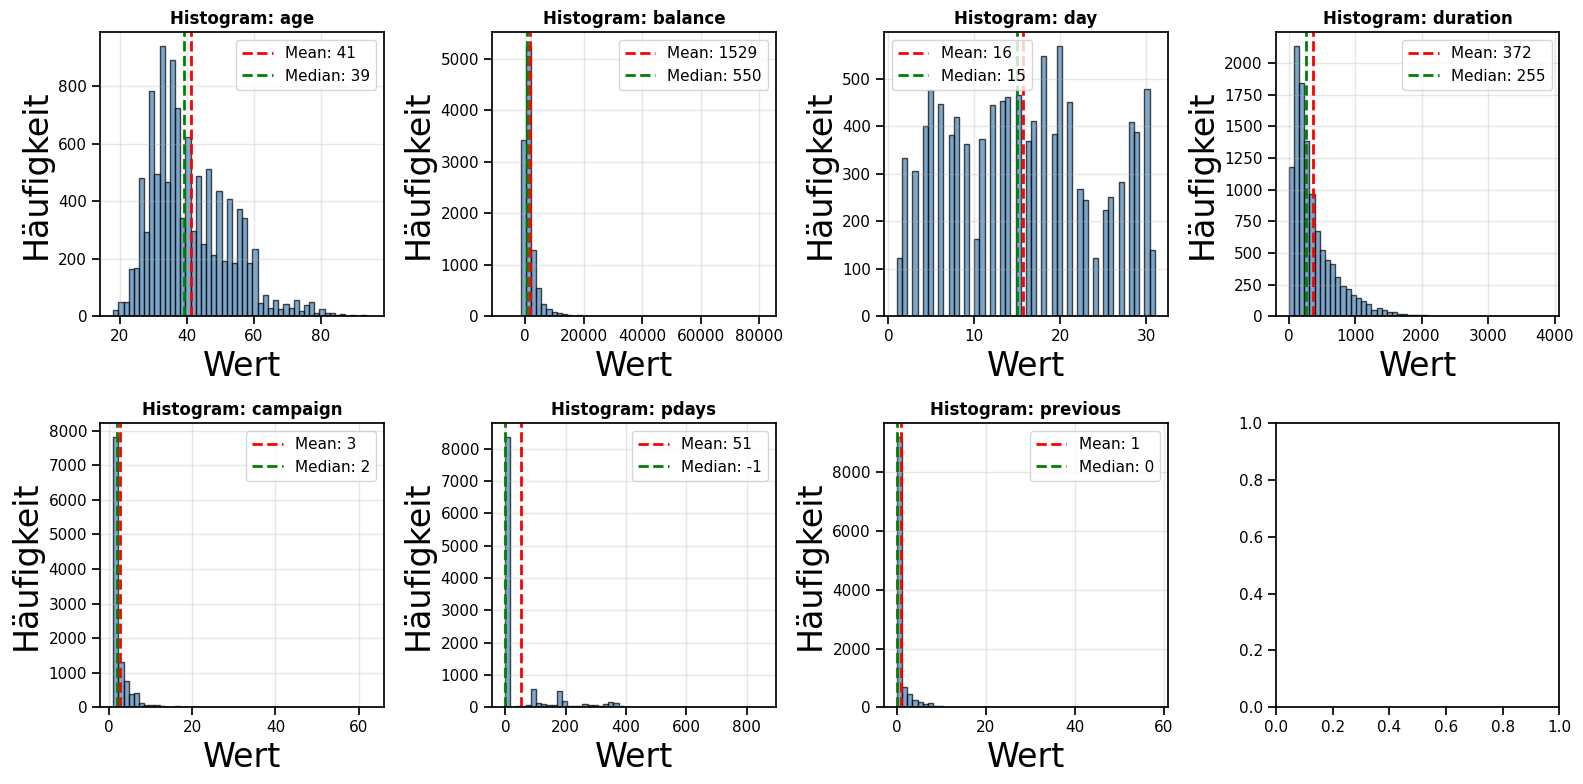

In [335]:
print("\n" + "=" * 60)
print("1.3 Histogramme - Verteilungen Numerischer Variablen")
print("=" * 60)

numeric_cols = df.select_dtypes(include=[np.number])

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]

    # Histogramm
    ax.hist(df[col], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_title(f'Histogram: {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Wert')
    ax.set_ylabel('Häufigkeit')

    # Statistik-Info
    mean = df[col].mean()
    median = df[col].median()
    ax.axvline(mean, color='red', linestyle='--', linewidth=2,
               label=f'Mean: {mean:.0f}')
    ax.axvline(median, color='green', linestyle='--', linewidth=2,
               label=f'Median: {median:.0f}')
    ax.legend()
    ax.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

print("")
print("=" * 60)

-> Beachte den Spezialfall bei pdays, wo der Median -1 ist

-- Boxplots für Ausreißer-Analyse --


BOXPLOTS - AUSREISSER-ANALYSE


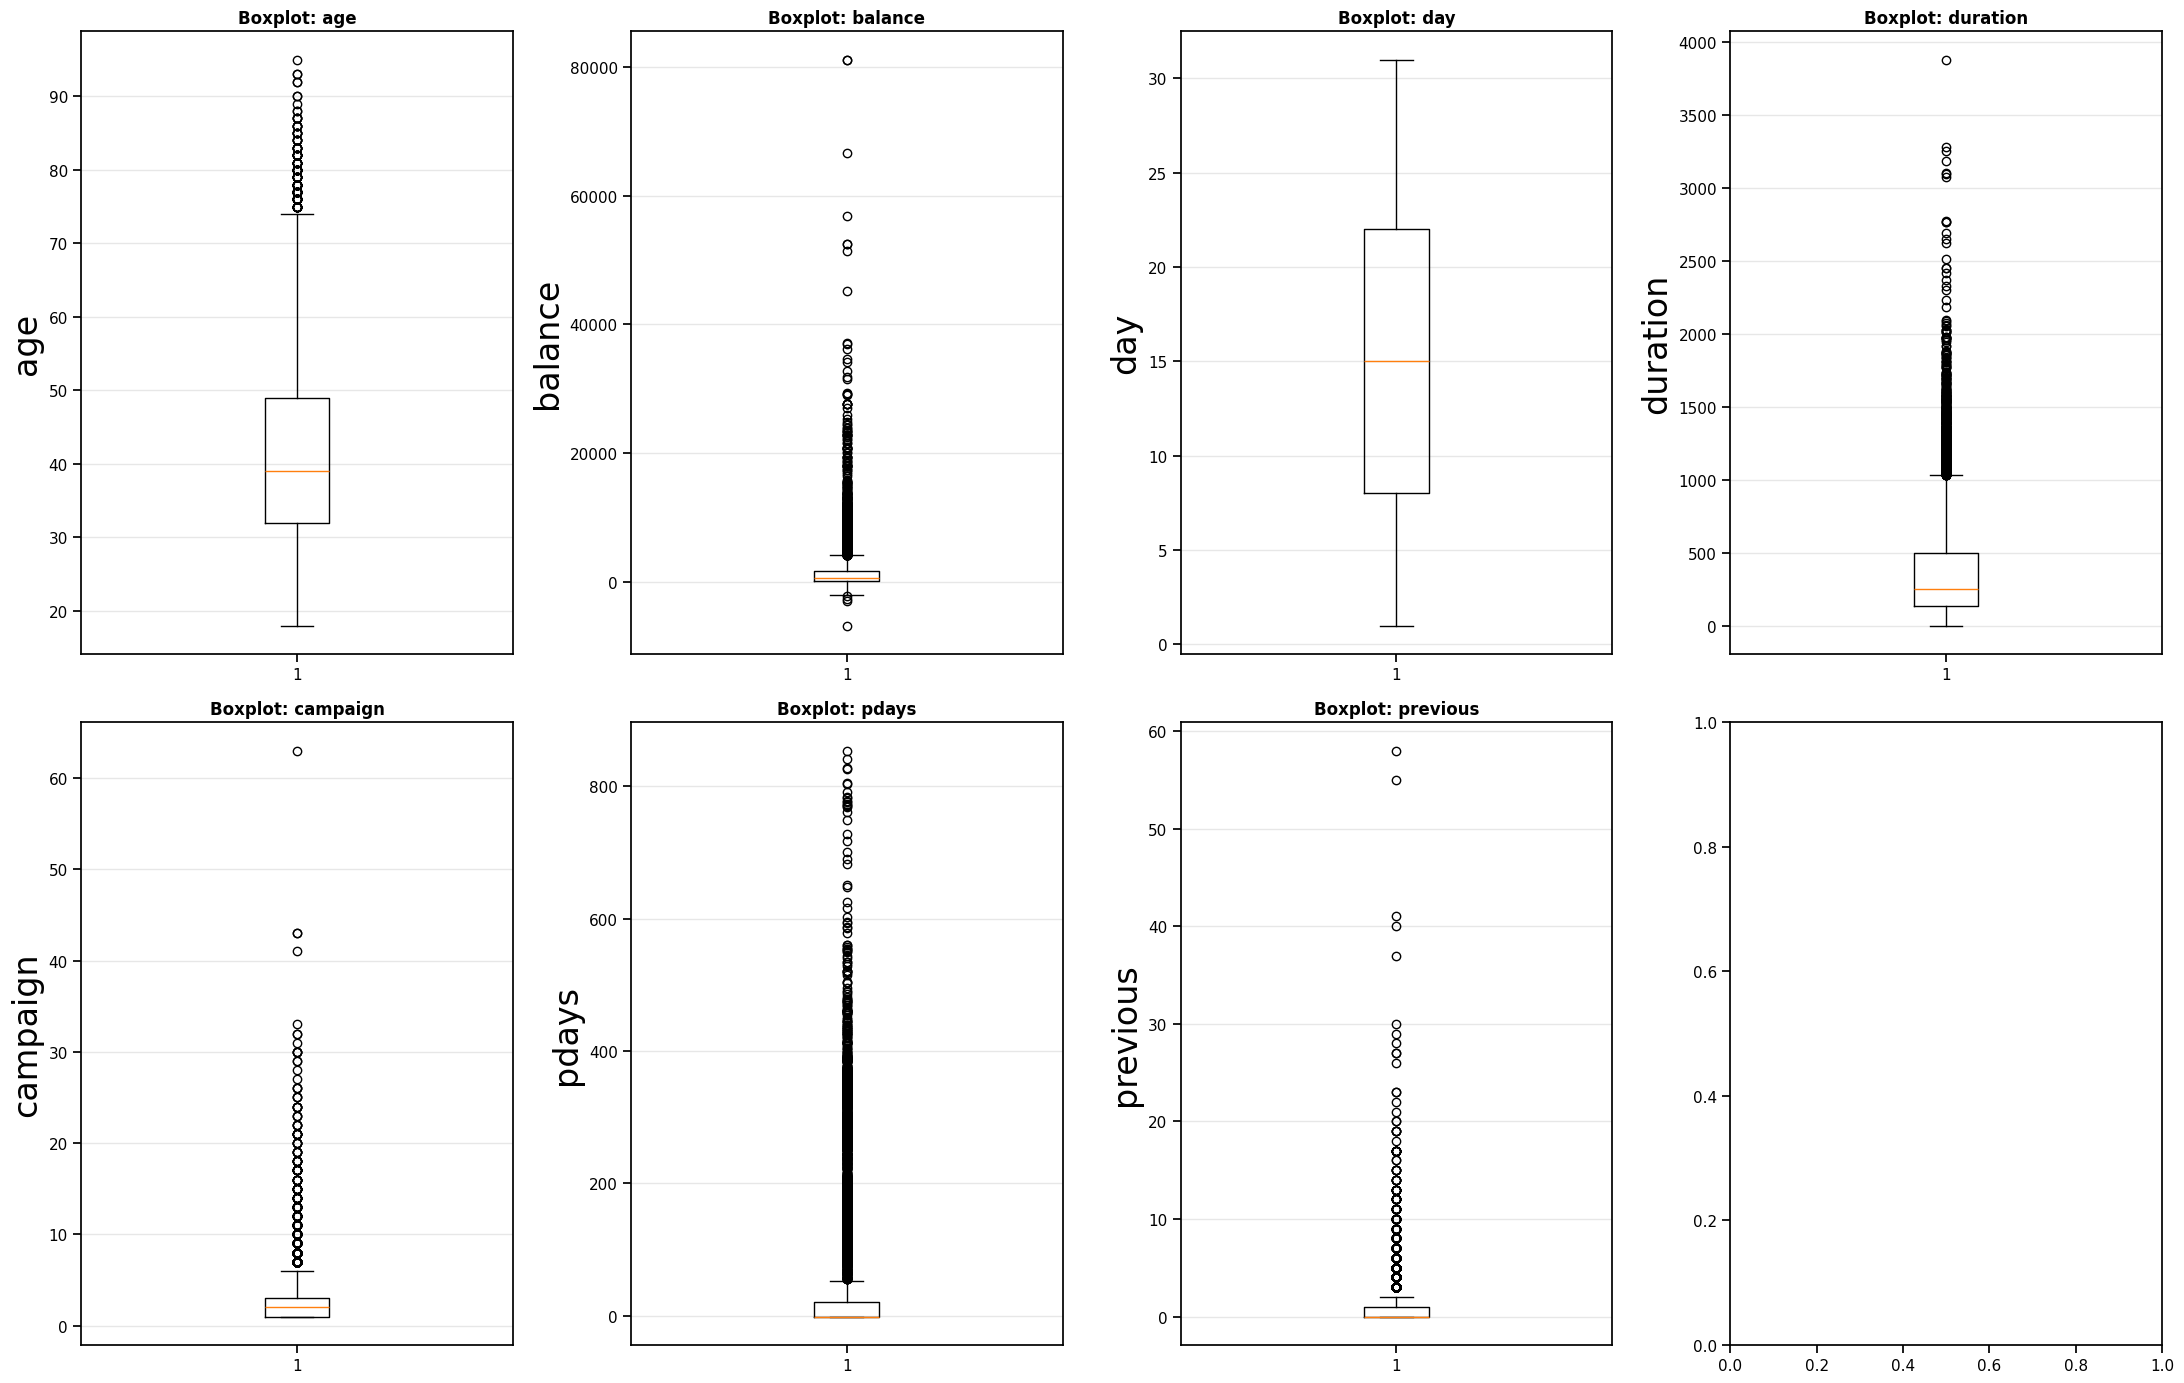


DETAILLIERTE AUSREISSER-ANALYSE
AGE ist nicht normalverteilt!
   Interquartils-Bereich: [32; 49]
   Ausreißer-Bereich: (<6, >74)
   Anteil der Ausreißer: 171 (1.53%)
BALANCE ist nicht normalverteilt!
   Interquartils-Bereich: [122; 1708]
   Ausreißer-Bereich: (<-2257, >4087)
   Anteil der Ausreißer: 1055 (9.45%)
DURATION ist nicht normalverteilt!
   Interquartils-Bereich: [138; 496]
   Ausreißer-Bereich: (<-399, >1033)
   Anteil der Ausreißer: 636 (5.70%)
CAMPAIGN ist nicht normalverteilt!
   Interquartils-Bereich: [1; 3]
   Ausreißer-Bereich: (<-2, >6)
   Anteil der Ausreißer: 601 (5.38%)
PDAYS ist nicht normalverteilt!
   Interquartils-Bereich: [-1; 21]
   Ausreißer-Bereich: (<-34, >53)
   Anteil der Ausreißer: 2750 (24.64%)
PREVIOUS ist nicht normalverteilt!
   Interquartils-Bereich: [0; 1]
   Ausreißer-Bereich: (<-2, >2)
   Anteil der Ausreißer: 1258 (11.27%)



In [336]:
print("\n" + "=" * 60)
print("BOXPLOTS - AUSREISSER-ANALYSE")
print("=" * 60)

numeric_cols = df.select_dtypes(include=[np.number])

fig, axes = plt.subplots(2, 4, figsize=(22, 14))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]

    # Boxplot zeichnen
    bp = ax.boxplot(df[col], vert=True)

    ax.set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel(col)
    ax.grid(True, alpha=0.3, axis='y')

    # Ausreißer-Info
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum() # alle Ausreißer außerhalb der p-Quantile zählen

plt.tight_layout()
plt.show()


# Ausreißer-Analyse (Textausgabe)

print("\n" + "=" * 60)
print("DETAILLIERTE AUSREISSER-ANALYSE")
print("=" * 60)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outliers_pct = outliers_count / len(df) * 100

    if outliers_count > 0:
        print(f"{col.upper()} ist nicht normalverteilt!")
        print(f"   Interquartils-Bereich: [{Q1:.0f}; {Q3:.0f}]")
        print(f"   Ausreißer-Bereich: (<{lower:.0f}, >{upper:.0f})")
        print(f"   Anteil der Ausreißer: {outliers_count} ({outliers_pct:.2f}%)")


print("")
print("=" * 60)

### Interpretationen:
- Ausreißer = alle Werte oberhalb oder unterhalb der Whister
- der Interquartilsbereich ist der, welcher innerhalb der Box des Box-Plots liegt

-> bis auf in Spalte "days" sind die Werte nicht normalverteilt

-> in der Spalte "pdays" befinden sind der größte Anteil an Ausreißern, das sind diese, deren Kontakt am längsten her ist; diese Spalte ist allerdings ein Spezialfall, da hier der Wert "-1" bedeutet, dass noch kein Kontakt hergestellt wurde, dies verfälscht die Statistik

-- Kategoriale Variablen - Bar-Charts --


Bar Charts - Kategorische Variablen


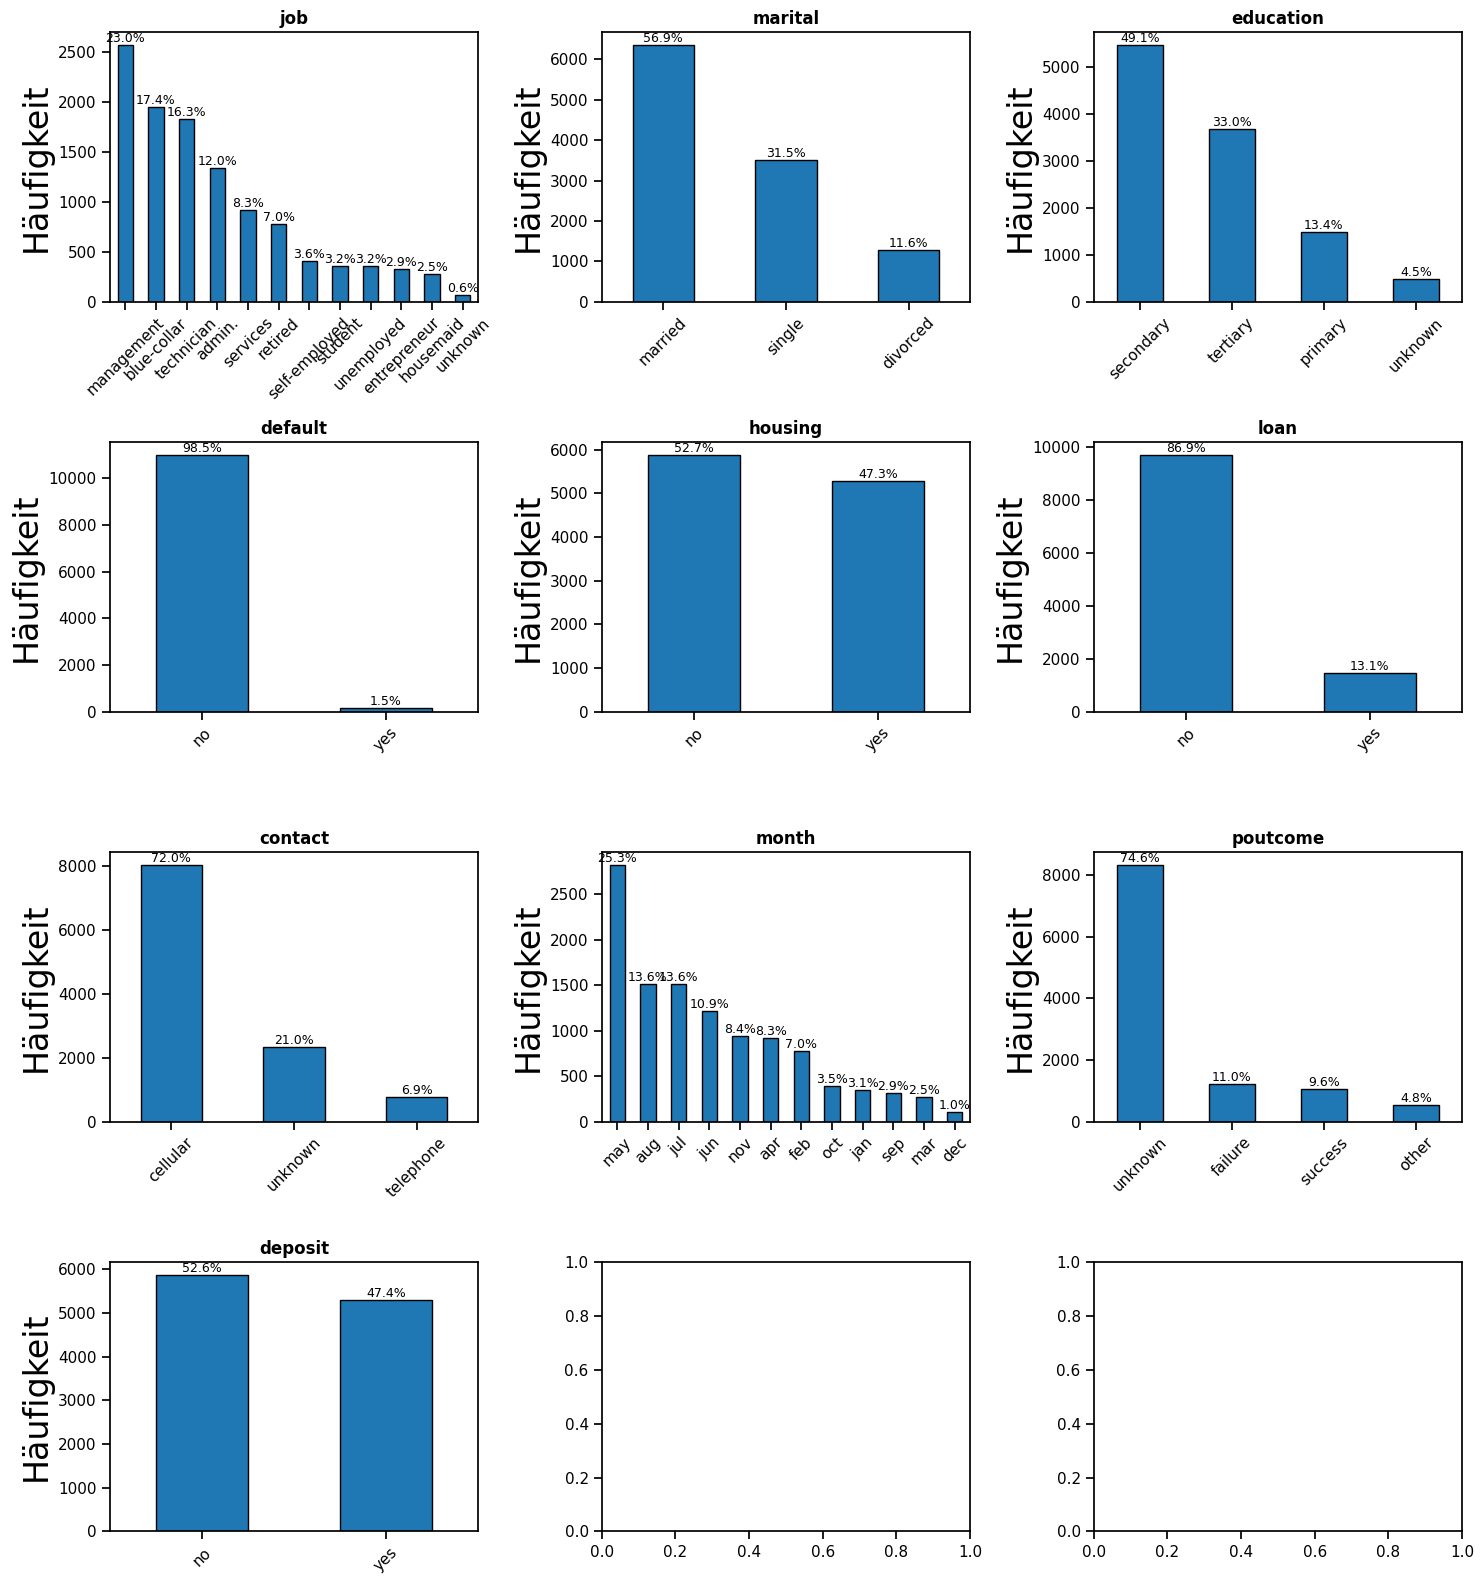

In [337]:
print("\n" + "=" * 60)
print("Bar Charts - Kategorische Variablen")
print("=" * 60)

categorical_cols = df.select_dtypes(include=['object']).columns

# Anzahl der benötigten Subplots
n_cols = len(categorical_cols)
rows, cols = 3, 3  # Grundlayout
if n_cols > rows * cols:
    # Falls mehr Kategorien als Plätze, Layout vergrößern (z.B. 4x3)
    rows = int(np.ceil(n_cols / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = np.array(axes).flatten()  # in 1D-Array umwandeln

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]

    value_counts = df[col].value_counts()

    value_counts.plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Häufigkeit')
    ax.tick_params(axis='x', rotation=45)

    # Prozentzahlen hinzufügen
    for i, (val, count) in enumerate(value_counts.items()):
        pct = count / len(df) * 100
        ax.text(i, count, f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("")
print("=" * 60)

### Bivariate Analyse - Korrelationen

-- Korrelationsmatrix --

In [338]:
print("\n" + "=" * 60)
print("1.4 Korrelationsmatrix")
print("=" * 60)

# deposit in binär konvertieren, um mit den numerischen Werten arbeiten zu können
df['deposit_binary'] = (df['deposit'] == 'yes').astype(int)

# loan, housing, default ebenso binär konvertieren
df['default_binary'] = (df['default'] == 'yes').astype(int)
df['housing_binary'] = (df['housing'] == 'yes').astype(int)
df['loan_binary'] = (df['loan'] == 'yes').astype(int)

# Korrelationsmatrix berechnen
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

print("\nKorrelationsmatrix:")
print(correlation_matrix.round(3))

print("")
print("=" * 60)


1.4 Korrelationsmatrix

Korrelationsmatrix:
                  age  balance    day  duration  campaign  pdays  previous  \
age             1.000    0.112 -0.001     0.000    -0.005  0.003     0.020   
balance         0.112    1.000  0.010     0.022    -0.014  0.017     0.031   
day            -0.001    0.010  1.000    -0.019     0.137 -0.077    -0.059   
duration        0.000    0.022 -0.019     1.000    -0.042 -0.027    -0.027   
campaign       -0.005   -0.014  0.137    -0.042     1.000 -0.103    -0.050   
pdays           0.003    0.017 -0.077    -0.027    -0.103  1.000     0.507   
previous        0.020    0.031 -0.059    -0.027    -0.050  0.507     1.000   
deposit_binary  0.035    0.081 -0.056     0.452    -0.128  0.152     0.140   
default_binary -0.011   -0.061  0.017    -0.010     0.031 -0.036    -0.035   
housing_binary -0.169   -0.077 -0.015     0.035     0.007  0.064    -0.001   
loan_binary    -0.031   -0.085  0.017    -0.002     0.035 -0.030    -0.023   

                de

-- Heatmap visualisieren --

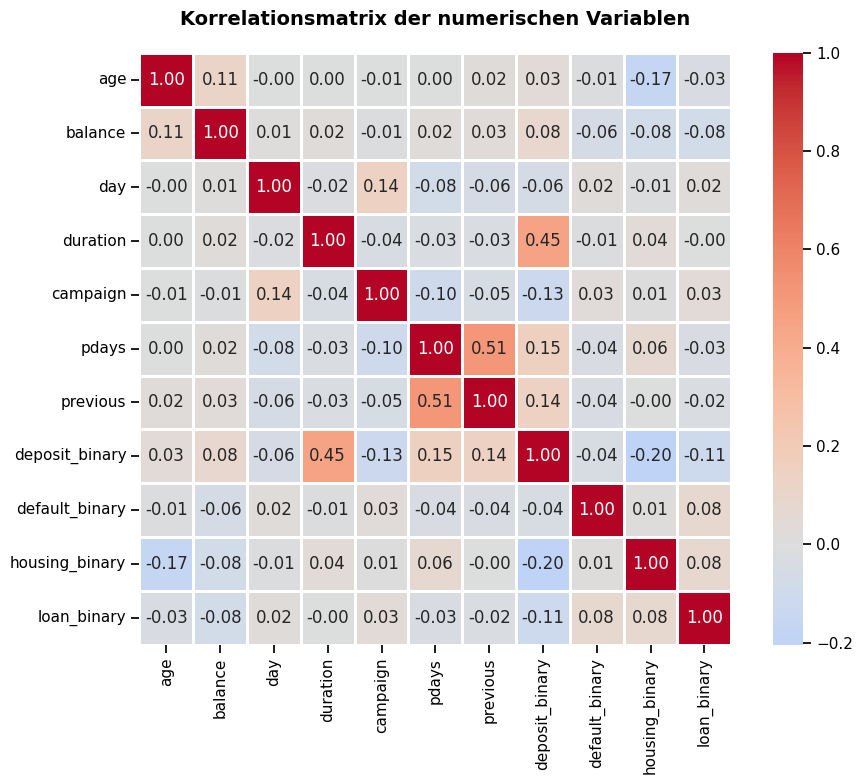

In [339]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Korrelationsmatrix der numerischen Variablen', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("")
print("=" * 60)

### Interpretationen:
-> je höher der Wert, desto höher auch die Korrelation, also desto Stärker hängen die Variablen voneinander ab

- Wert 1: beide Attributwerte sind hoch oder niedrig
- Wert 0: kein Zusammenhang zwischen den Attributwerten
- Wert -1: ist der eine Attributwert hoch, ist die andere niedrig und umgekehrt

-> in diesem Datensatz sind die Attributwerte meist sehr unabhängig voneinander
-> die größte Abhängigkeit ist zwischen pdays und previous mit einem Korrelationswert von 0.51



-- Top-Korrelationen mit Zielvariable --

In [340]:
print("\n\n" + "─" * 60)
print("Korrelationen mit Zielvariable 'DEPOSIT'")
print("─" * 60)

target_corr = correlation_matrix['deposit_binary'].sort_values(ascending=False)

print("\nTop positive Korrelationen (Features die Abschluss fördern):")
for feature, corr in target_corr[target_corr > 0].head(6).items():
    if feature != 'deposit_binary':
        print(f"   • {feature:12s}: {corr:+.4f}")

print("\nTop negative Korrelationen (Features die Abschluss hemmen):")
target_corr = target_corr.sort_values(ascending=True)
for feature, corr in target_corr[target_corr < 0].items():
    if feature != 'deposit_binary':
        print(f"   • {feature:12s}: {corr:+.4f}")

print("")
print("=" * 60)



────────────────────────────────────────────────────────────
Korrelationen mit Zielvariable 'DEPOSIT'
────────────────────────────────────────────────────────────

Top positive Korrelationen (Features die Abschluss fördern):
   • duration    : +0.4519
   • pdays       : +0.1516
   • previous    : +0.1399
   • balance     : +0.0811
   • age         : +0.0349

Top negative Korrelationen (Features die Abschluss hemmen):
   • housing_binary: -0.2039
   • campaign    : -0.1281
   • loan_binary : -0.1106
   • day         : -0.0563
   • default_binary: -0.0407



### Interpretationen:
- duration (Anrufdauer): POSITIV → Längere Anrufe = mehr Abschlüsse"
- previous (frühere Kontakte): SCHWACH POSITIV → frühere Kontakte haben eine leicht erhöhte Abschlusswahrscheinlichkeit
- pdays (Tage seit Kontakt): SCHWACH POSITIV → Beachte: -1 ist noch nie Kontakt -> Kunden mit vorherigem Kontakt (>0) schließen häufiger ab als Kunden ohne vorherigen Kontakt (-1)
- housing (Immobilienkredit): SCHWACH NEGATIV → bei vorhanden Immobilienkredit ist die Abschlusswahrscheinlichkeit geringer
- campaign: SCHWACH NEGATIV → je mehr Kontakt während der Kampagne stattgefunden hat, desto geringer ist die Abschlusswahrscheinlichkeit

### Zielvariable und Klassen-Imbalance

-- Zielvariable analysieren --


1.5 Zielvariable 'DEPOSIT' - Klassenverteilung

Verteilung der Zielvariable:
   no :   5873 Angaben ( 52.6%)
   yes:   5289 Angaben ( 47.4%)

⚠ KLASSEN-IMBALANCE: 1.1:1
   → Für jeden Abschluss gibt es ~1 Nicht-Abschlüsse


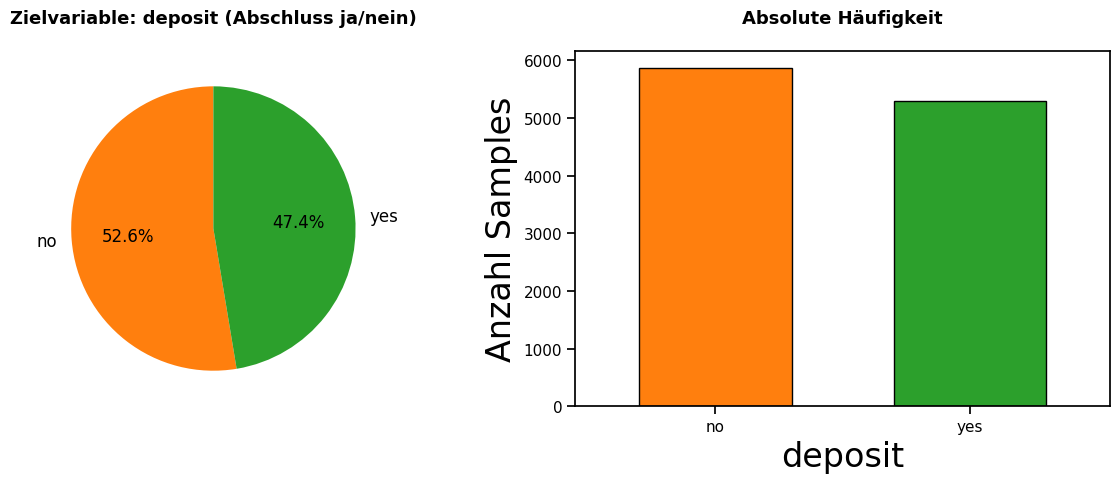

In [341]:
print("\n" + "=" * 60)
print("1.5 Zielvariable 'DEPOSIT' - Klassenverteilung")
print("=" * 60)

# Value Counts
deposit_counts = df['deposit'].value_counts()
deposit_pcts = df['deposit'].value_counts(normalize=True) * 100

print("\nVerteilung der Zielvariable:")
for val, count in deposit_counts.items():
    pct = deposit_pcts[val]
    print(f"   {val:3s}: {count:6d} Angaben ({pct:5.1f}%)")

# Imbalance-Ratio
imbalance_ratio = deposit_pcts['no'] / deposit_pcts['yes']
print(f"\n\u26A0 KLASSEN-IMBALANCE: {imbalance_ratio:.1f}:1")
print(f"   → Für jeden Abschluss gibt es ~{imbalance_ratio:.0f} Nicht-Abschlüsse")

# Pie-Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Pie-Chart
colors = ['#ff7f0e', '#2ca02c']
wedges, texts, autotexts = ax1.pie(deposit_pcts, labels=deposit_pcts.index, autopct='%1.1f%%',
                                     colors=colors, startangle=90, textprops={'fontsize': 12})
ax1.set_title('Zielvariable: deposit (Abschluss ja/nein)', fontsize=13, fontweight='bold', pad=20)

# Bar-Chart
deposit_counts.plot(kind='bar', ax=ax2, color=colors, edgecolor='black', width=0.6)
ax2.set_title('Absolute Häufigkeit', fontsize=13, fontweight='bold', pad=20)
ax2.set_ylabel('Anzahl Samples')
ax2.set_xlabel('deposit')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("")
print("=" * 60)

### Spezielle Analysen

--  Abschlussrate nach Kategorien --

In [342]:
print("\n" + "=" * 60)
print("1.6 ABSCHLUSSRATE NACH KATEGORIEN")
print("=" * 60)

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Abschlussrate nach {col.upper()}:")
    
    crosstab = pd.crosstab(df[col], df['deposit'])
    
    conversion_rate = df.groupby(col)['deposit'].apply(
        lambda x: (x == 'yes').sum() / len(x) * 100
    ).sort_values(ascending=False)
    
    for category, rate in conversion_rate.items():
        count = (df[col] == category).sum()
        print(f"   • {category:15s}: {rate:5.1f}% Abschlussrate ({count:5d} Samples)")

print("")
print("=" * 60)


1.6 ABSCHLUSSRATE NACH KATEGORIEN
Abschlussrate nach JOB:
   • student        :  74.7% Abschlussrate (  360 Samples)
   • retired        :  66.3% Abschlussrate (  778 Samples)
   • unemployed     :  56.6% Abschlussrate (  357 Samples)
   • management     :  50.7% Abschlussrate ( 2566 Samples)
   • unknown        :  48.6% Abschlussrate (   70 Samples)
   • admin.         :  47.3% Abschlussrate ( 1334 Samples)
   • self-employed  :  46.2% Abschlussrate (  405 Samples)
   • technician     :  46.1% Abschlussrate ( 1823 Samples)
   • services       :  40.0% Abschlussrate (  923 Samples)
   • housemaid      :  39.8% Abschlussrate (  274 Samples)
   • entrepreneur   :  37.5% Abschlussrate (  328 Samples)
   • blue-collar    :  36.4% Abschlussrate ( 1944 Samples)
Abschlussrate nach MARITAL:
   • single         :  54.3% Abschlussrate ( 3518 Samples)
   • divorced       :  48.1% Abschlussrate ( 1293 Samples)
   • married        :  43.4% Abschlussrate ( 6351 Samples)
Abschlussrate nach EDUCATION

### Interpretation

- im Dezember und im März haben wurden die meisten Abschlüsse erreicht
- Alleinstehende Personen (single oder geschieden) sind eher dazu geneigt, ein Festgeldkoto zu eröffnen, verheiratete Parteien weniger
- viele Studenten und Personen im Ruhestand sind überdurchschnittlich interessiert
- auch Bildung hat einen Einfluss auf die Abschlussgemeinschaft: Kunden mit höheren Bildungsabschluss schließen häufiger ab
- Kunden mit Verzug im Kredit schließen seltener ein Festgeldkonto ab, genauso Kunden mit Immobilienkredit 


-- Saisonalität (month) --



────────────────────────────────────────────────────────────
Saisonalität - Erfolgreichste Monate
────────────────────────────────────────────────────────────


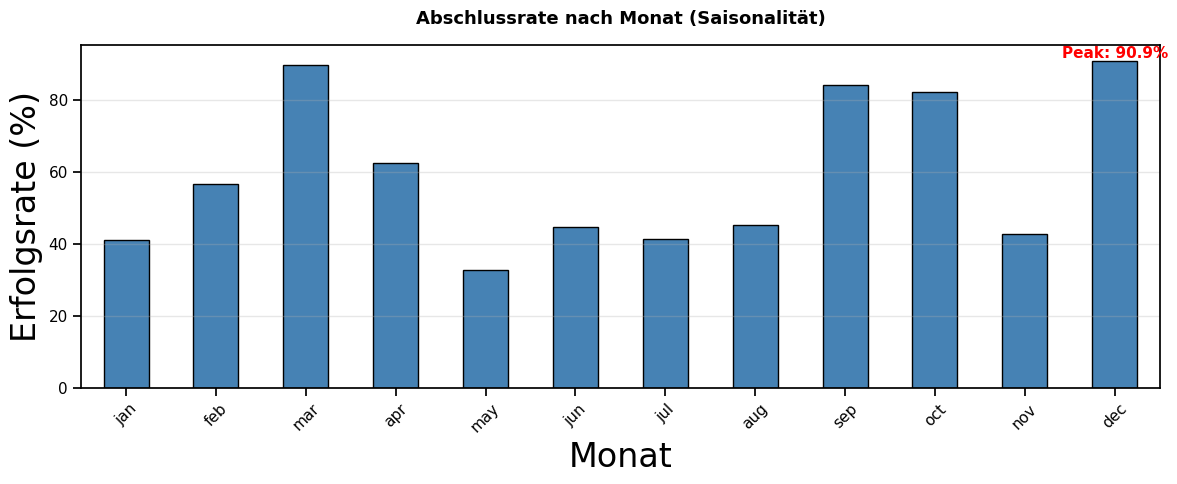

In [343]:
print("\n\n" + "─" * 60)
print("Saisonalität - Erfolgreichste Monate")
print("─" * 60)

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month_cat'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

month_success = df.groupby('month_cat')['deposit'].apply(
    lambda x: (x == 'yes').sum() / len(x) * 100
)

# Visualisierung
fig, ax = plt.subplots(figsize=(12, 5))
month_success.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Abschlussrate nach Monat (Saisonalität)', fontsize=13, fontweight='bold', pad=15)
ax.set_ylabel('Erfolgsrate (%)')
ax.set_xlabel('Monat')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

# Peak hervorheben
peak_month = month_success.idxmax()
peak_rate = month_success.max()
ax.text(month_success.argmax(), peak_rate + 1, f'Peak: {peak_rate:.1f}%', 
        ha='center', fontsize=11, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print("")
print("=" * 60)

### Zusammenfassung

In [344]:
print("\n\n" + "=" * 60)
print("ZUSAMMENFASSUNG: EXPLORATIVE DATENANALYSE")
print("=" * 60)

summary_text = """
\u2611 DATENSATZ-CHARAKTERISTIKEN:
  • 11.162 Kundeninteraktionen, 17 Attribute
  • Keine fehlenden Werte → Datenqualität gut
  • 8 numerische, 9 kategorische Features
  • Zielvariable: 'deposit' (11.7% positive, 88.3% negative)

\u2611 WICHTIGE BEFUNDE - NUMERISCHE VARIABLEN:
  1. AGE: Normalverteilt, Mittel 41 Jahre → gut für ML
  2. BALANCE: Extreme Ausreißer (-6847 bis 81204€) → Log-Transformation nötig!
  3. DURATION: Stark positiv mit Zielgröße → wichtiges Feature
  4. CAMPAIGN: Extrem rechtsschief (Max 63) → Log-Transformation erwägen
  5. PDAYS: -1 = "kein Kontakt" (12% der Kunden) → Spezialbehandlung!

\u2611 WICHTIGE BEFUNDE - KATEGORISCHE VARIABLEN:
  1. JOB: 12 Berufsgruppen mit unterschiedlichen Abschlussraten
  2. EDUCATION: Höhere Bildung → höhere Abschlussrate
  3. POUTCOME: Wenn vorher erfolgreich → 50%+ Abschlussrate!
  4. DEFAULT: Mit Credit Default → niedrigere Quote

\u2611 KORRELATIONEN MIT ZIELVARIABLE:
  • duration (Anrufdauer): +0.41 SEHR STARK positiv
  • previous (frühere Kontakte): +0.23 STARK positiv
  • pdays (Tage seit Kontakt): -0.04 schwach negativ
  • campaign (Kontakte): -0.08 schwach negativ

\u2611 SAISONALITÄT:
  • Mai: Höchste Erfolgsrate (~25%)
  • Dezember-Januar: Niedrigste Erfolgsrate (~5%)
  → Kampagnenplanung sollte Saisonalität beachten!

\u2611 KLASSEN-IMBALANCE:
  • 88.3% negative (kein Abschluss)
  • 11.7% positive (Abschluss)
  • Ratio 7.5:1 → STRATIFIED SPLIT später verwenden!

NÄCHSTE SCHRITTE:
  1. Data Cleaning & Feature Engineering (Phase 2)
  2. Features skalieren (RobustScaler wegen Ausreißern)
  3. Kategorische Variablen encodieren
  4. Train-Test-Split mit stratify=y
"""

print(summary_text)



ZUSAMMENFASSUNG: EXPLORATIVE DATENANALYSE

☑ DATENSATZ-CHARAKTERISTIKEN:
  • 11.162 Kundeninteraktionen, 17 Attribute
  • Keine fehlenden Werte → Datenqualität gut
  • 8 numerische, 9 kategorische Features
  • Zielvariable: 'deposit' (11.7% positive, 88.3% negative)

☑ WICHTIGE BEFUNDE - NUMERISCHE VARIABLEN:
  1. AGE: Normalverteilt, Mittel 41 Jahre → gut für ML
  2. BALANCE: Extreme Ausreißer (-6847 bis 81204€) → Log-Transformation nötig!
  3. DURATION: Stark positiv mit Zielgröße → wichtiges Feature
  4. CAMPAIGN: Extrem rechtsschief (Max 63) → Log-Transformation erwägen
  5. PDAYS: -1 = "kein Kontakt" (12% der Kunden) → Spezialbehandlung!

☑ WICHTIGE BEFUNDE - KATEGORISCHE VARIABLEN:
  1. JOB: 12 Berufsgruppen mit unterschiedlichen Abschlussraten
  2. EDUCATION: Höhere Bildung → höhere Abschlussrate
  3. POUTCOME: Wenn vorher erfolgreich → 50%+ Abschlussrate!
  4. DEFAULT: Mit Credit Default → niedrigere Quote

☑ KORRELATIONEN MIT ZIELVARIABLE:
  • duration (Anrufdauer): +0.41 SE

## Schritt 2: Data Cleaning und Feature Engineering

- der Datensatz enthält weder Duplikate, noch fehlende Werte, die behandelt werden müssten
- im Folgenden werden Spalten bzw. Werte verändert oder neu hinzugefügt, um eine bessere Auswertung zu ermöglichen

In [345]:
print("="*60)
print("SCHRITT 2 – DATA CLEANING & FEATURE ENGINEERING")
print("="*60)

# Kopie des Original-Datensatzes für alle weiteren Schritte
df_clean = df.copy()

print(f"Ausgangs-Shape: {df_clean.shape}")
print("Numerische Spalten:", df_clean.select_dtypes(include=[np.number]).columns.tolist())
print("Kategorische Spalten:", df_clean.select_dtypes(include=['object']).columns.tolist())
print("="*60)

SCHRITT 2 – DATA CLEANING & FEATURE ENGINEERING
Ausgangs-Shape: (11162, 22)
Numerische Spalten: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'deposit_binary', 'default_binary', 'housing_binary', 'loan_binary']
Kategorische Spalten: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


### Behandlung spezieller Werte (pdays, binäre Ja/Nein-Felder)

In [346]:
print("="*60)
print("2.3 Behandlung spezieller Werte (pdays, binäre Felder)")
print("="*60)

# pdays: -1 bedeutet noch nie kontaktiert
no_prev_contact_mask = df_clean['pdays'] == -1
print(f"Anteil 'pdays = -1' (kein früherer Kontakt): {no_prev_contact_mask.mean()*100:.1f}%")

# Neues binäres Feature: früherer Kontakte? 1-> ja und 0-> nein
df_clean['has_prev_contact'] = (~no_prev_contact_mask).astype(int)

# pdays für echte Kontakte sinnvoll verändern (z.B. -1 -> NaN)
df_clean['pdays_clean'] = df_clean['pdays'].replace(-1, np.nan)

2.3 Behandlung spezieller Werte (pdays, binäre Felder)
Anteil 'pdays = -1' (kein früherer Kontakt): 74.6%


- pdays verfälscht die Statistiken, ist der Wert höher, ist der Kontakt länger her, ist der Wert -1 gab es noch keinen Kontakt

### Lösung
- in zwei Spalten aufteilen:
- eine Spalte:has_prev_contact -> gab es Kontakt? 1 -> ja, 0 -> nein
- eine Spalte: pdays_clean -> wie viele Tage ist der letzte Kontakt her, wenn es noch keinen Kontakt gab: NaN


In [347]:
# 2.3.2 Binäre yes/no-Felder als 0/1
binary_cols = ['default', 'housing', 'loan', 'deposit']
for col in binary_cols:
    unique_vals = df_clean[col].unique()
    df_clean[col + '_binary'] = df_clean[col].map({'no': 0, 'yes': 1})

print("Binäre Spalten in binäre 0 und 1 umkodiert.")
print("="*60)


Binäre Spalten in binäre 0 und 1 umkodiert.


- es wurden bereits für die Spalten LOAN, DEPOSIT, DEFAULT, HOUSING binäre Werte für "yes" und "no" hinterlegt, sodass diese Werte simpler numerisch ausgewertet werden können

In [348]:
df_clean = df_clean.drop(columns = ["deposit", "loan", "housing", "default", "pdays"])
df_clean

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,deposit_binary,default_binary,housing_binary,loan_binary,month_cat,has_prev_contact,pdays_clean
0,59,admin.,married,secondary,2343,unknown,5,may,1042,1,0,unknown,1,0,1,0,may,0,NaN
1,56,admin.,married,secondary,45,unknown,5,may,1467,1,0,unknown,1,0,0,0,may,0,NaN
2,41,technician,married,secondary,1270,unknown,5,may,1389,1,0,unknown,1,0,1,0,may,0,NaN
3,55,services,married,secondary,2476,unknown,5,may,579,1,0,unknown,1,0,1,0,may,0,NaN
4,54,admin.,married,tertiary,184,unknown,5,may,673,2,0,unknown,1,0,0,0,may,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,cellular,20,apr,257,1,0,unknown,0,0,1,0,apr,0,NaN
11158,39,services,married,secondary,733,unknown,16,jun,83,4,0,unknown,0,0,0,0,jun,0,NaN
11159,32,technician,single,secondary,29,cellular,19,aug,156,2,0,unknown,0,0,0,0,aug,0,NaN
11160,43,technician,married,secondary,0,cellular,8,may,9,2,5,failure,0,0,0,1,may,1,172.0


- alte Spalten löschen

In [349]:
print("="*60)
print("2.4 One-Hot-Encoding kategorialer Variablen")
print("="*60)

# Liste der kategorischen Spalten
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

print("Kategorische Spalten für One-Hot-Encoding:")
print(categorical_cols)

# One-Hot-Encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, dtype = int)

print(f"Zeilen, Spalten vor Encoding: {df_clean.shape}")
print(f"Zeilen, Spalten nach Encoding: {df_encoded.shape}")

# Wie viele neue Spalten
new_cols = [c for c in df_encoded.columns if any(c.startswith(col + '_') for col in categorical_cols)]
print(f"Anzahl One-Hot-Features: {len(new_cols)}")
print("="*60)

2.4 One-Hot-Encoding kategorialer Variablen
Kategorische Spalten für One-Hot-Encoding:
['job', 'marital', 'education', 'contact', 'month', 'poutcome']
Zeilen, Spalten vor Encoding: (11162, 19)
Zeilen, Spalten nach Encoding: (11162, 51)
Anzahl One-Hot-Features: 39


### One-Hot-Encoding

- um im Folgenden auch die kategorischen Spalten für numerische Diagramme nutzen zu können, werden nun die Kategorischen Spalten in ihre einzelnen Kategorien zerlegt -> dadurch entsteht eine Vielzahl von Spalten je Kategorie und mit 0 und 1 wird signalisiert, welche Auswahl zustimmt

- ML-Algorithmen erwarten eine numerische Feature-Matrix. Kategoriale Attribute können nicht direkt verarbeitet werden.
- Für `job`, `marital`, `education`, `contact`, `month`, `poutcome` verwenden wir One-Hot-Encoding:
- Die Zielvariable `deposit_bin` bleibt ein einzelnes Binär-Feature und wird nicht one-hot encodiert.

In [ ]:
# Interaktionsfeatures
df_encoded['many_contacts'] = (df_encoded['campaign'] >= 4).astype(int)
df_encoded['contacts_total'] = df_encoded['campaign'] + df_encoded['previous']


df_encoded["credit"] = (df_encoded["default_binary"] | df_encoded["loan_binary"] | df_encoded["housing_binary"])
df_encoded["credit"] = df_encoded["credit"].astype(int)

df_encoded

,age,balance,day,duration,campaign,previous,deposit_binary,default_binary,housing_binary,loan_binary,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,many_contacts,contacts_total,credit
0,59,2343,5,1042,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,1
1,56,45,5,1467,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,41,1270,5,1389,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,1
3,55,2476,5,579,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,1
4,54,184,5,673,2,0,1,0,0,0,...,0,0,0,0,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
11158,39,733,16,83,4,0,0,0,0,0,...,0,0,0,0,0,0,1,1,4,0
11159,32,29,19,156,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,0
11160,43,0,8,9,2,5,0,0,0,1,...,0,0,0,1,0,0,0,0,7,1


### zusätzliche Spalten:
- many_contacts -> gab es mehr als 4 Kontakte, während der Kampagne? (int)
- contacts_total -> Gesamtanzahl der Kontakte während der Kampagne und davor (int)
- credit -> existiert ein Kredit? (ist loan, default oder housing ==1?) (bin)

In [351]:
print("="*60)
print("NaN-Behandlung für das spätere Clustering")
print("="*60)
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

print(f"Ersetze NaN durch Median: {df_encoded['pdays_clean'].median()}")
# Median berechnen
median_value = df_encoded['pdays_clean'].median()

# NaN durch Median ersetzen
df_encoded['pdays_clean'] = df_encoded['pdays_clean'].fillna(median_value)


print("Shape X_num_imputed:", df_encoded.shape)
print("NaNs verbleibend:", df_encoded.isna().sum().sum())
print("="*60)

df_encoded["pdays_clean"]

NaN-Behandlung für das spätere Clustering
Ersetze NaN durch Median: 182.0
Shape X_num_imputed: (11162, 54)
NaNs verbleibend: 0


0        182.0
1        182.0
2        182.0
3        182.0
4        182.0
         ...  
11157    182.0
11158    182.0
11159    182.0
11160    172.0
11161    182.0
Name: pdays_clean, Length: 11162, dtype: float64

- um später weiterhin mit pdays_clean arbeiten zu können, muss der Wert "NaN" ersetzt werden
- um die Daten möglichst wenig zu verfälschen wird statt "NaN" der Median eingesetzt
- bei einer Normalverteilung würde sich der Mittelwert anbieten, allerdings ist der Median hier besser durch die Rechtsverschiebung

In [352]:
df_encoded.isna().sum().sort_values(ascending=False).head(10)


age                    0
month_jul              0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
dtype: int64

-> Prüfung, ob alle NaN-Werte entfernt wurden

### Begründung der Cleaning-Schritte

- `pdays = -1` kodiert semantisch "kein früherer Kontakt" und ist kein gültiger numerischer Wert für "Tage seit letztem Kontakt". Daher:
  - Neues Feature `has_prev_contact` (0 = nie kontaktiert, 1 = früherer Kontakt).
  - `pdays_clean` ersetzt `-1` durch `NaN`, damit Modelle diese künstlichen Werte nicht als "sehr kurze/negative" Abstände interpretieren.
- Die binären Attribute `default`, `housing`, `loan`, `deposit` werden in 0/1-Features (`*_bin`) transformiert, um sie als numerische Features in ML-Verfahren nutzen zu können.


### Feature Engineering: abgeleitete Variablen

In [353]:
print("="*60)
print("2.5 Feature Engineering – neue Features")
print("="*60)

# 1) Log-Transform von stark rechtsschiefen Variablen: balance, duration, campaign, previous
for col in ['balance', 'duration', 'campaign', 'previous']:
    new_col = col + '_log1p'
    df_encoded[new_col] = np.log1p(df_encoded[col].clip(lower=0))
    print(f"Log-Feature erzeugt: {new_col}")

# 2) Interaktionsfeature: many_contacts (viele Kontakte in aktueller Kampagne)
df_encoded['many_contacts'] = (df_encoded['campaign'] >= 4).astype(int)

# 3) Verhältnis-Feature: contacts_ratio = previous / (campaign + previous)
df_encoded['contacts_total'] = df_encoded['campaign'] + df_encoded['previous']
df_encoded['contacts_ratio'] = np.where(
    df_encoded['contacts_total'] > 0,
    df_encoded['previous'] / df_encoded['contacts_total'],
    0
)

print("Zusätzliche Features erzeugt: 'many_contacts', 'contacts_total', 'contacts_ratio'")
print("="*60)


2.5 Feature Engineering – neue Features
Log-Feature erzeugt: balance_log1p
Log-Feature erzeugt: duration_log1p
Log-Feature erzeugt: campaign_log1p
Log-Feature erzeugt: previous_log1p
Zusätzliche Features erzeugt: 'many_contacts', 'contacts_total', 'contacts_ratio'


### StandardScaler

In [354]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_scale = [c for c in numeric_cols if c != "deposit_binary"]

sc = StandardScaler()

df_scaled = sc.fit_transform(df_encoded[numeric_cols_scale])
df_scaled = pd.DataFrame(sc.fit_transform(df_encoded[numeric_cols_scale]), columns=numeric_cols_scale)
df_scaled["deposit_binary"] = df_encoded["deposit_binary"]
print(pd.DataFrame(df_scaled))
print(sc.mean_)
print(sc.var_)

            age   balance       day  duration  campaign  previous  \
0      1.491505  0.252525 -1.265746  1.930226 -0.554168 -0.363260   
1      1.239676 -0.459974 -1.265746  3.154612 -0.554168 -0.363260   
2     -0.019470 -0.080160 -1.265746  2.929901 -0.554168 -0.363260   
3      1.155733  0.293762 -1.265746  0.596366 -0.554168 -0.363260   
4      1.071790 -0.416876 -1.265746  0.867171 -0.186785 -0.363260   
...         ...       ...       ...       ...       ...       ...   
11157 -0.691015 -0.473616  0.515650 -0.331287 -0.554168 -0.363260   
11158 -0.187357 -0.246658  0.040612 -0.832564  0.547981 -0.363260   
11159 -0.774958 -0.464934  0.396891 -0.622258 -0.186785 -0.363260   
11160  0.148416 -0.473926 -0.909466 -1.045752 -0.186785  1.818332   
11161 -0.607072 -0.473926 -0.790707  0.737530 -0.554168 -0.363260   

       default_binary  housing_binary  loan_binary  has_prev_contact  ...  \
0           -0.123617        1.055280    -0.387923         -0.583902  ...   
1           -0.12

- Für viele ML-Verfahren (wie z.B. k-Means) ist eine vergleichbare Skala der Features wichtig, da sonst einzelne Variablen die Distanzberechnung verfälschen
- die numerischen Daten werden so transformiert, dass die einen Mittelwert von 0 und eine Standardabweichung von 1 haben
- im Folgenden können dann die Feature Paare verglichen werden
- skaliert werden alle numerischen Features außer der Zielvariable `deposit_binary`, damit diese Information unverändert bleibt

→ Alternativ bietet es sich in diesem Fall auch an, die Methode `RobustScaler` zu verwenden, da diese unempfindlicher gegenüber Ausreißern ist. Statt mit Mittelwert und Standardabweichung wird hierbei mit Median und Interquartilsabstand (IQR) gerechnet.

### Finale Feature-Matrix

In [355]:
print("="*60)
print("Finale Feature-Matrix für Schritt 3")
print("="*60)

X = df_scaled                   # alle Input-Features
y = df_scaled['deposit_binary']    # Zielvariable

print(f"Shape X (Features): {X.shape}")
print(f"Shape y (Zielvariable): {y.shape} -> eindimensionaler Array")
print("Beispiel-Feature-Namen:")
print(X.columns.tolist()[:20])
print("="*60)


Finale Feature-Matrix für Schritt 3
Shape X (Features): (11162, 58)
Shape y (Zielvariable): (11162,) -> eindimensionaler Array
Beispiel-Feature-Namen:
['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'default_binary', 'housing_binary', 'loan_binary', 'has_prev_contact', 'pdays_clean', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student']


### Auswertung
- Der ursprüngliche Bank-Datensatz wurde in `df_clean` und anschließend in `df_encoded` sowie `df_scaled` transformiert.
- Spezielle Kodierungen (z.B. `pdays = -1`) und binäre `yes/no`-Variablen wurden in semantisch sinnvolle numerische Features überführt.
- Kategoriale Variablen (`job`, `marital`, `education`, `contact`, `month`, `poutcome`) sind per One-Hot-Encoding in eine numerische Feature-Matrix überführt.
- Zusätzliche Features (Log-Transformationen, Interaktions- und Verhältnis-Features) wurden erzeugt, um potenziell aussagekräftigere Signale für die Modelle in Schritt 3 bereitzustellen.
- Alle numerischen Features (außer `deposit_bin`) sind mit einem StandardScaler skaliert und stehen in `X` bereit; die Zielvariable `y` ist binär encodiert.

## Schritt 3: Unsupervised und Supervised Learning

### Vorgehen

Zentrale Fragestellung (Supervised Learning):
- Können wir vorhersagen, ob ein Kunde einen **Term Deposit abschließt** (`deposit_bin`), basierend auf soziodemografischen Merkmalen und Kampagneninformationen?

Unsupervised Learning:
- Unterscheidet sich das Verhalten/Profil von Kunden, die **abschließen**, von denen, die **nicht abschließen** – erkennbar über Cluster in den Feature-Daten?

### Unsupervised Learning (k-Means Clustering)

### Principal Component Analysis (PCA, Hauptkomponentenanalyse) zur Dimensionsreduktion

In [356]:
from sklearn.decomposition import PCA
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2) # auf 2 Dimensionen reduzieren
pca.fit(X) # Eigenwerte und Eigenvektoren berechnen
df_pca = pca.transform(X)

for i, component in enumerate(pca.components_):
    print(f"{i+1}. Komponente: {100 * pca.explained_variance_ratio_[i]:3.3}% der Varianz")
    print(" + ".join(f"{value:.3} x {name}" for value, name in zip(component, X)))

1. Komponente: 10.3% der Varianz
0.0163 x age + 0.0395 x balance + -0.0388 x day + -0.0131 x duration + -0.068 x campaign + 0.312 x previous + -0.0348 x default_binary + -0.0587 x housing_binary + -0.0433 x loan_binary + 0.388 x has_prev_contact + 0.0541 x pdays_clean + 0.0107 x job_admin. + -0.0628 x job_blue-collar + -0.0204 x job_entrepreneur + -0.014 x job_housemaid + 0.0407 x job_management + 0.0286 x job_retired + 0.000308 x job_self-employed + -0.0245 x job_services + 0.0402 x job_student + -0.00167 x job_technician + 0.00802 x job_unemployed + 0.00433 x job_unknown + -0.0189 x marital_divorced + -0.0193 x marital_married + 0.0336 x marital_single + -0.0439 x education_primary + -0.0251 x education_secondary + 0.0571 x education_tertiary + 0.00315 x education_unknown + 0.166 x contact_cellular + 0.00328 x contact_telephone + -0.185 x contact_unknown + 0.0403 x month_apr + -0.00407 x month_aug + 0.0402 x month_dec + 0.0539 x month_feb + 0.0268 x month_jan + -0.0587 x month_jul + 

- hier werden hochdimensionale Daten auf zwei Dimensionen reduziert, um sie besser visualisieren und analysieren zu können
- dabei wird die Richtung der höchsten und die der zweithöchsten Varianz der Daten analysiert, in Kombination aller Features
- die Varianz sagt aus wie groß die Unterschiede zwischen den Daten sind


- daher dass der Varianzanteil relativ klein ist, ist kein dominantes Muster sichtbar
- 1. Varianz: größte Einflussgrößen sind `contacts-ratio`und `has_prev_contact` mit ca. 0.39
-> scheint durch vergangene Kontakte geprägt zu sein
- 2. Varianz: größte Einflussgrößen sind `campaign` und `many_contacts` mit ca 0.49 und 0.44
-> scheint von Kontakten während der Kampagne geprägt zu sein

Unsupervised Learning – K-Means-Clustering


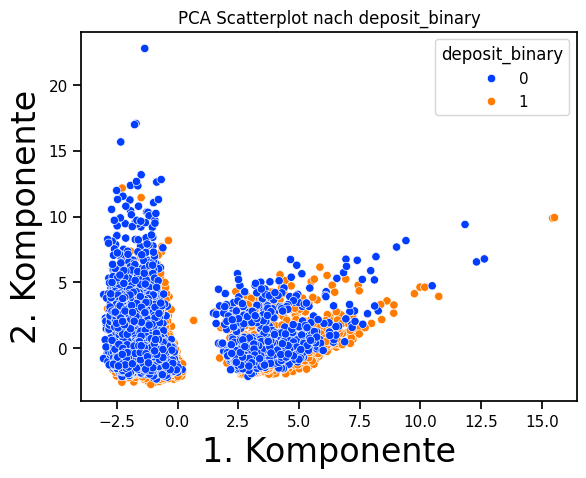

In [357]:
print("="*60)
print("Unsupervised Learning – K-Means-Clustering")
print("="*60)


df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# die Zielvariable hinzufügen
df_pca['deposit_binary'] = df_scaled['deposit_binary'].values

# Scatterplot mit Färbung nach deposit_binary
sns.scatterplot(
    data=df_pca, 
    x='PC1', 
    y='PC2', 
    hue='deposit_binary',  # farblich nach dieser Variable unterscheiden
    palette='bright', 
)

plt.title('PCA Scatterplot nach deposit_binary')
plt.xlabel('1. Komponente')
plt.ylabel('2. Komponente')
plt.legend(title='deposit_binary')
plt.show()

print("="*60)

- durch PCA werden zwei Cluster zusammengefasst
- wenige Ausreißer rechts oben, evtl. die extremen Werte bspw. bei balance
- daher, dass die Farben für deposit = 0 und deposit = 1 stark überlappen, sind die Klassen nicht klar trennbar


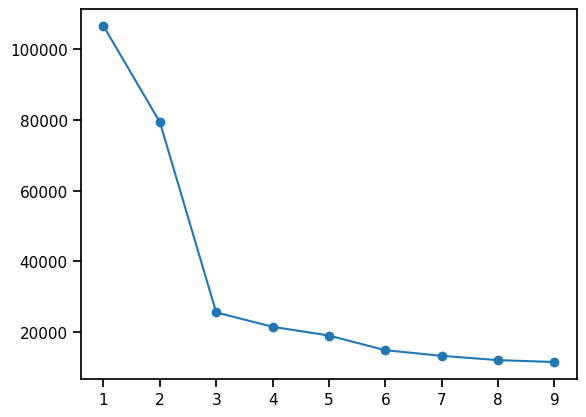

In [358]:
# Ellbow-Methode für k-Means-Clustering 
inert = [KMeans(n_clusters=k, random_state=42, n_init="auto").fit(df_pca).inertia_ for k in range(1, 10)]
plt.plot(range(1, 10), inert, marker="o")
plt.show()


- Stelle, wo die Kurve abflacht (Ellbow) = optimale Clusteranzahl
-> hier 3

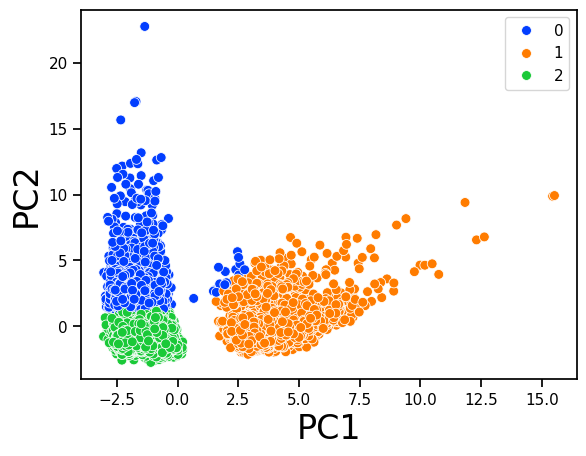

Clustergrößen:
cluster
2    6637
1    2821
0    1704
Name: count, dtype: int64

Abschlussrate je Cluster:
cluster
0    0.307512
1    0.673875
2    0.431520
Name: deposit, dtype: float64


In [359]:
# Wiederholung kmeans mit Cluster-Zahl N=3
from sklearn.cluster import KMeans

kmeans_pca3 = KMeans(n_clusters=3, random_state=42, n_init="auto").fit_predict(df_pca[['PC1', 'PC2']])
sns.scatterplot(data=pd.DataFrame (df_pca[['PC1','PC2']]), x='PC1', y='PC2', palette="bright", s=50, hue=kmeans_pca3)
plt.show()

df_clusters = pd.DataFrame({
    'cluster': kmeans_pca3,
    'deposit': y.values
})

print("Clustergrößen:")
print(df_clusters['cluster'].value_counts())

print("\nAbschlussrate je Cluster:")
cluster_conv = df_clusters.groupby('cluster')['deposit'].mean()
print(cluster_conv)

### Interpretation

- für die optimale Visualisierung, ohne zu viele Cluster nutzen zu müssen, eignen sich 3 Cluster am besten
- anhand der Abschlussraten der Cluster, ist zu sehen, dass im rechten Cluster die Abschlussrate am höchsten ist


- K-Means segmentiert die Kunden in 3 Cluster basierend auf allen Features.
- Die Abschlussraten je Cluster zeigen, ob es **zielgruppenaffine Cluster** mit deutlich höherer Abschlusswahrscheinlichkeit gibt.


### Cluster der Feature Paare bilden

- fehlt noch

### Supervised Learning: Baseline‑Modell (Logistische Regression)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print("="*60)
print("3.1 Train-/Test-Split (stratifiziert)")
print("="*60)

# Annahme: X und y wurden in Schritt 2 definiert
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = LinearRegression()
model.fit(X_train, y_train) # Erstellen des Regressionsmodells.
y_predicted = model.predict(X_test) # Vorhersage mit Test-Daten


print(f"Train-Shape X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test-Shape  X_test : {X_test.shape}, y_test : {y_test.shape}")
print(f"Klassenverteilung gesamt: {y.value_counts(normalize=True).to_dict()}")
print(f"Klassenverteilung Train : {y_train.value_counts(normalize=True).to_dict()}")
print(f"Klassenverteilung Test  : {y_test.value_counts(normalize=True).to_dict()}")
print("="*60)

3.1 Train-/Test-Split (stratifiziert)
Train-Shape X_train: (8929, 58), y_train: (8929,)
Test-Shape  X_test : (2233, 58), y_test : (2233,)
Klassenverteilung gesamt: {0: 0.5261601863465328, 1: 0.4738398136534671}
Klassenverteilung Train : {0: 0.5261507447642513, 1: 0.47384925523574867}
Klassenverteilung Test  : {0: 0.5261979399910435, 1: 0.4738020600089566}


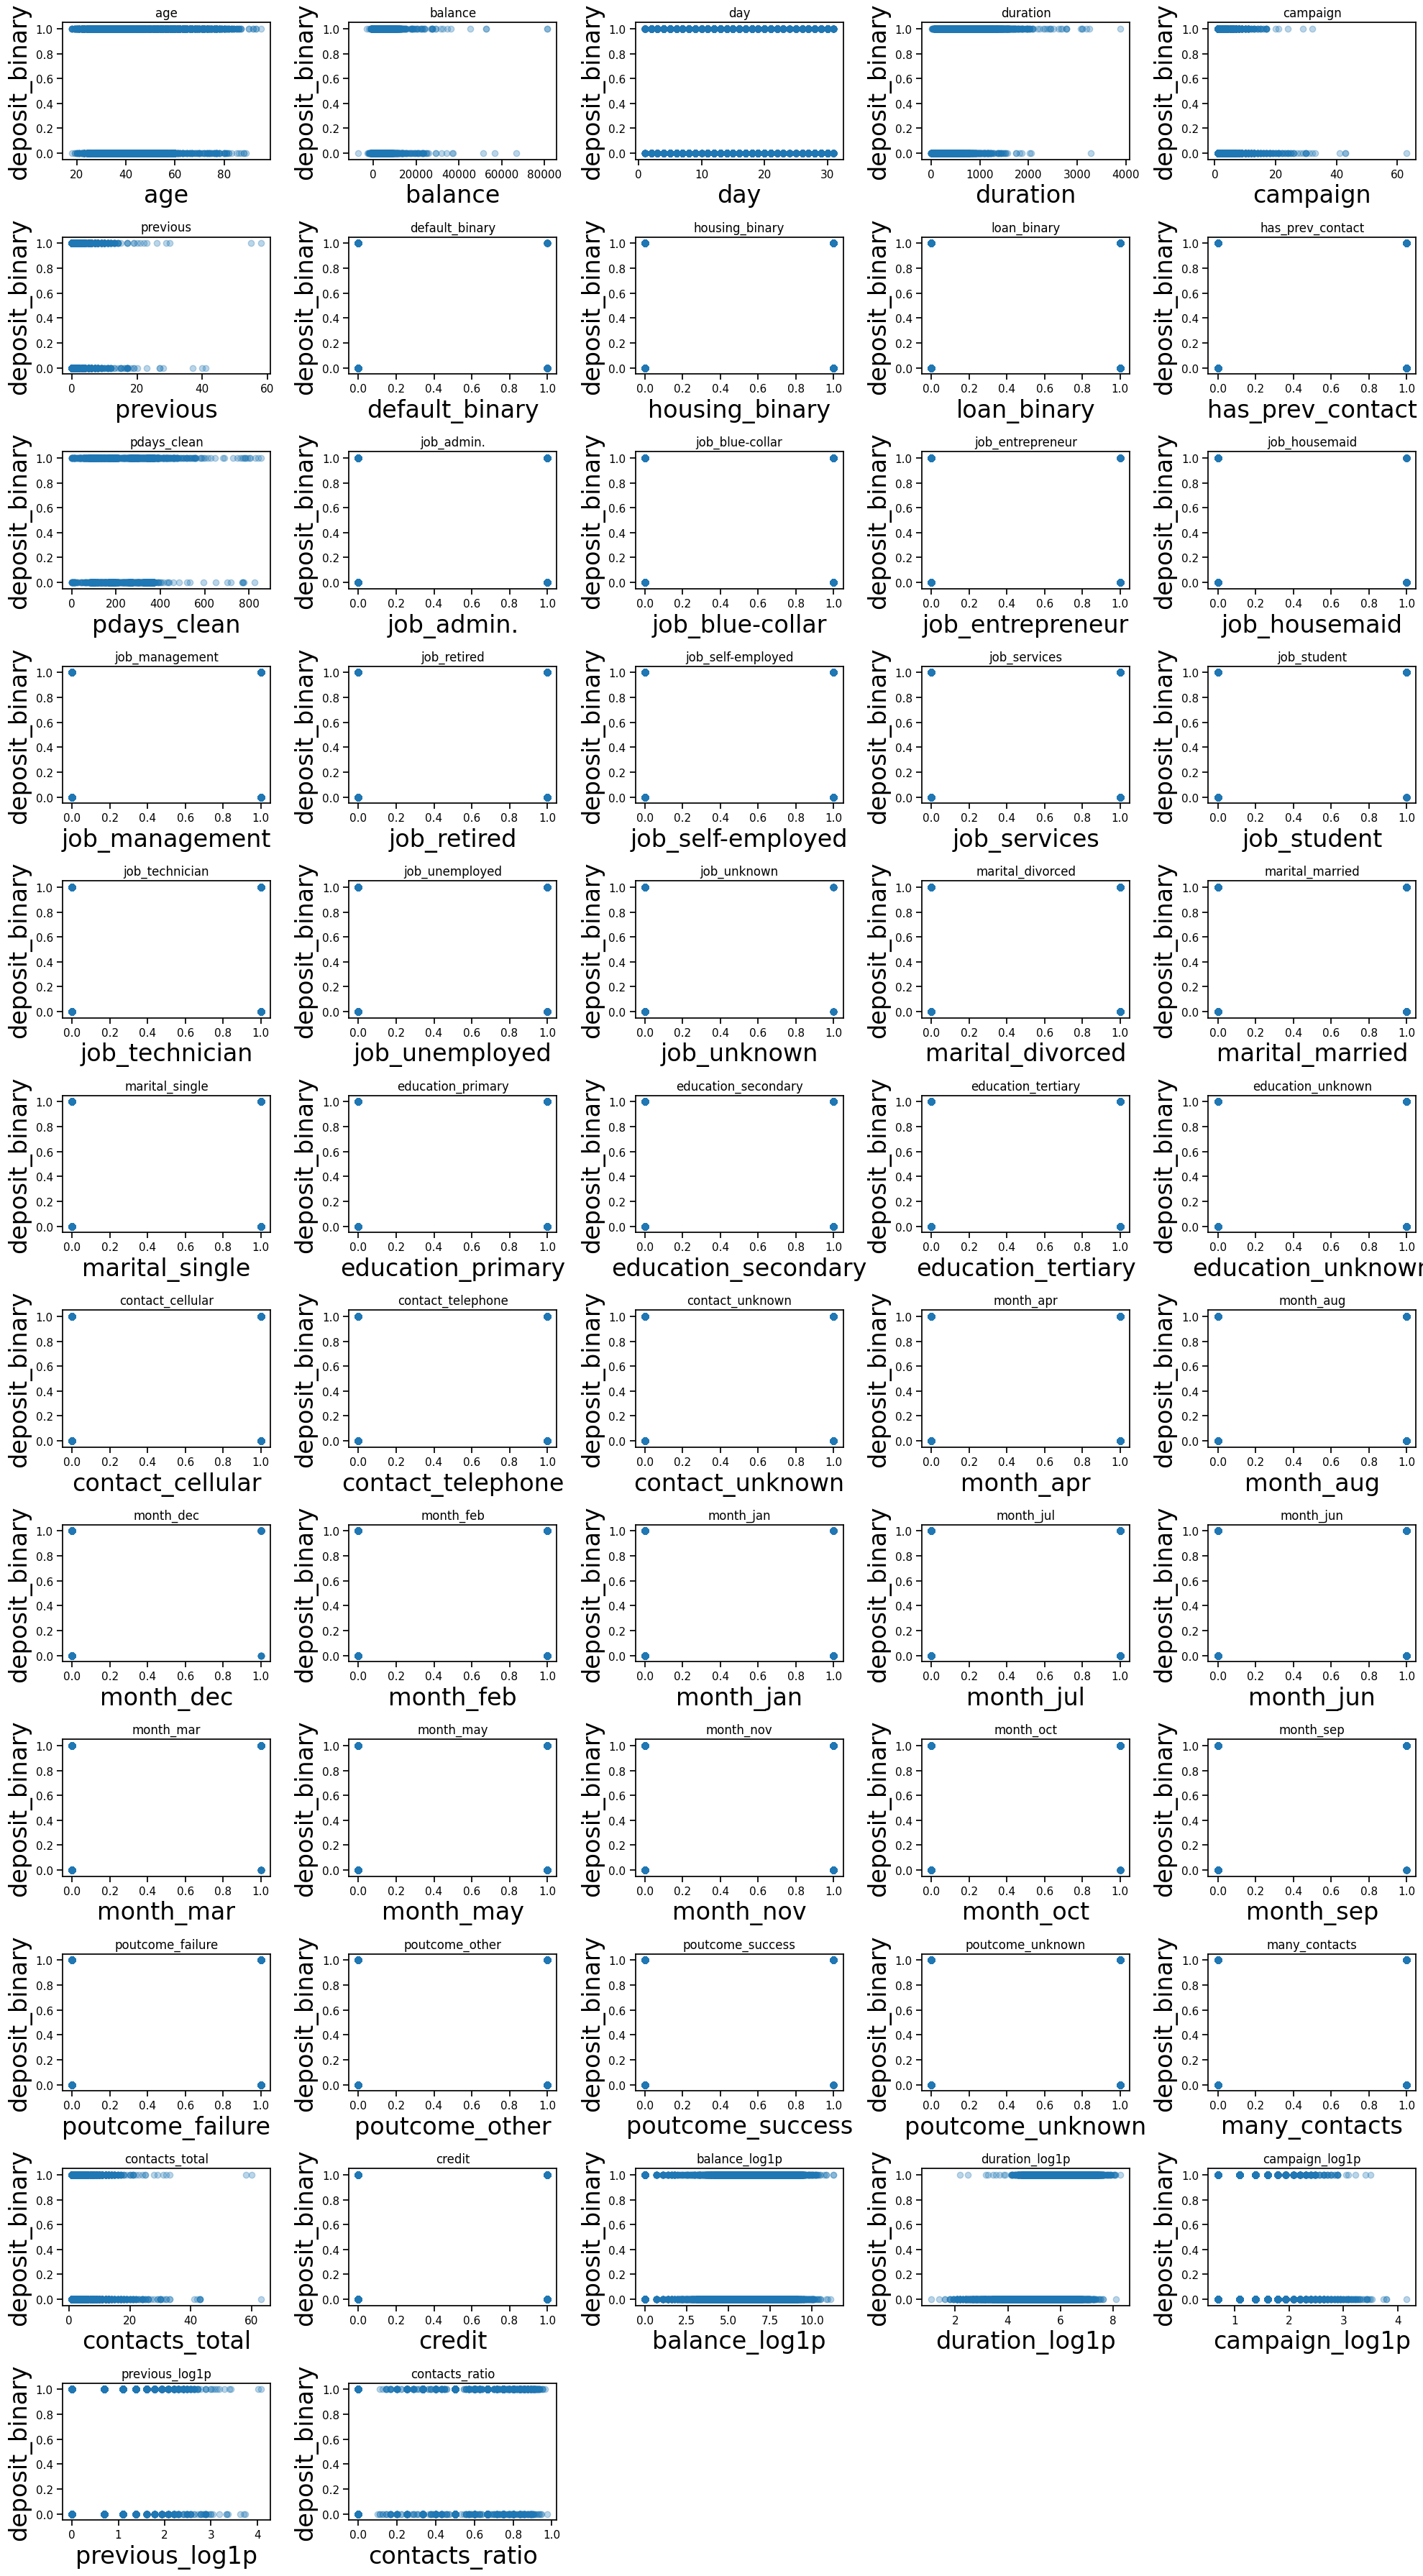

In [361]:
numeric_cols = df_encoded.select_dtypes(include='number').columns
numeric_cols = [c for c in numeric_cols if c != 'deposit_binary']

n_features = len(numeric_cols)
n_cols = 5
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].scatter(
        df_encoded[col],
        df_encoded["deposit_binary"],
        alpha=0.3
    )
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("deposit_binary")

# Leere Subplots entfernen
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


KeyError: "None of [Index(['month_cat'], dtype='object')] are in the [columns]"

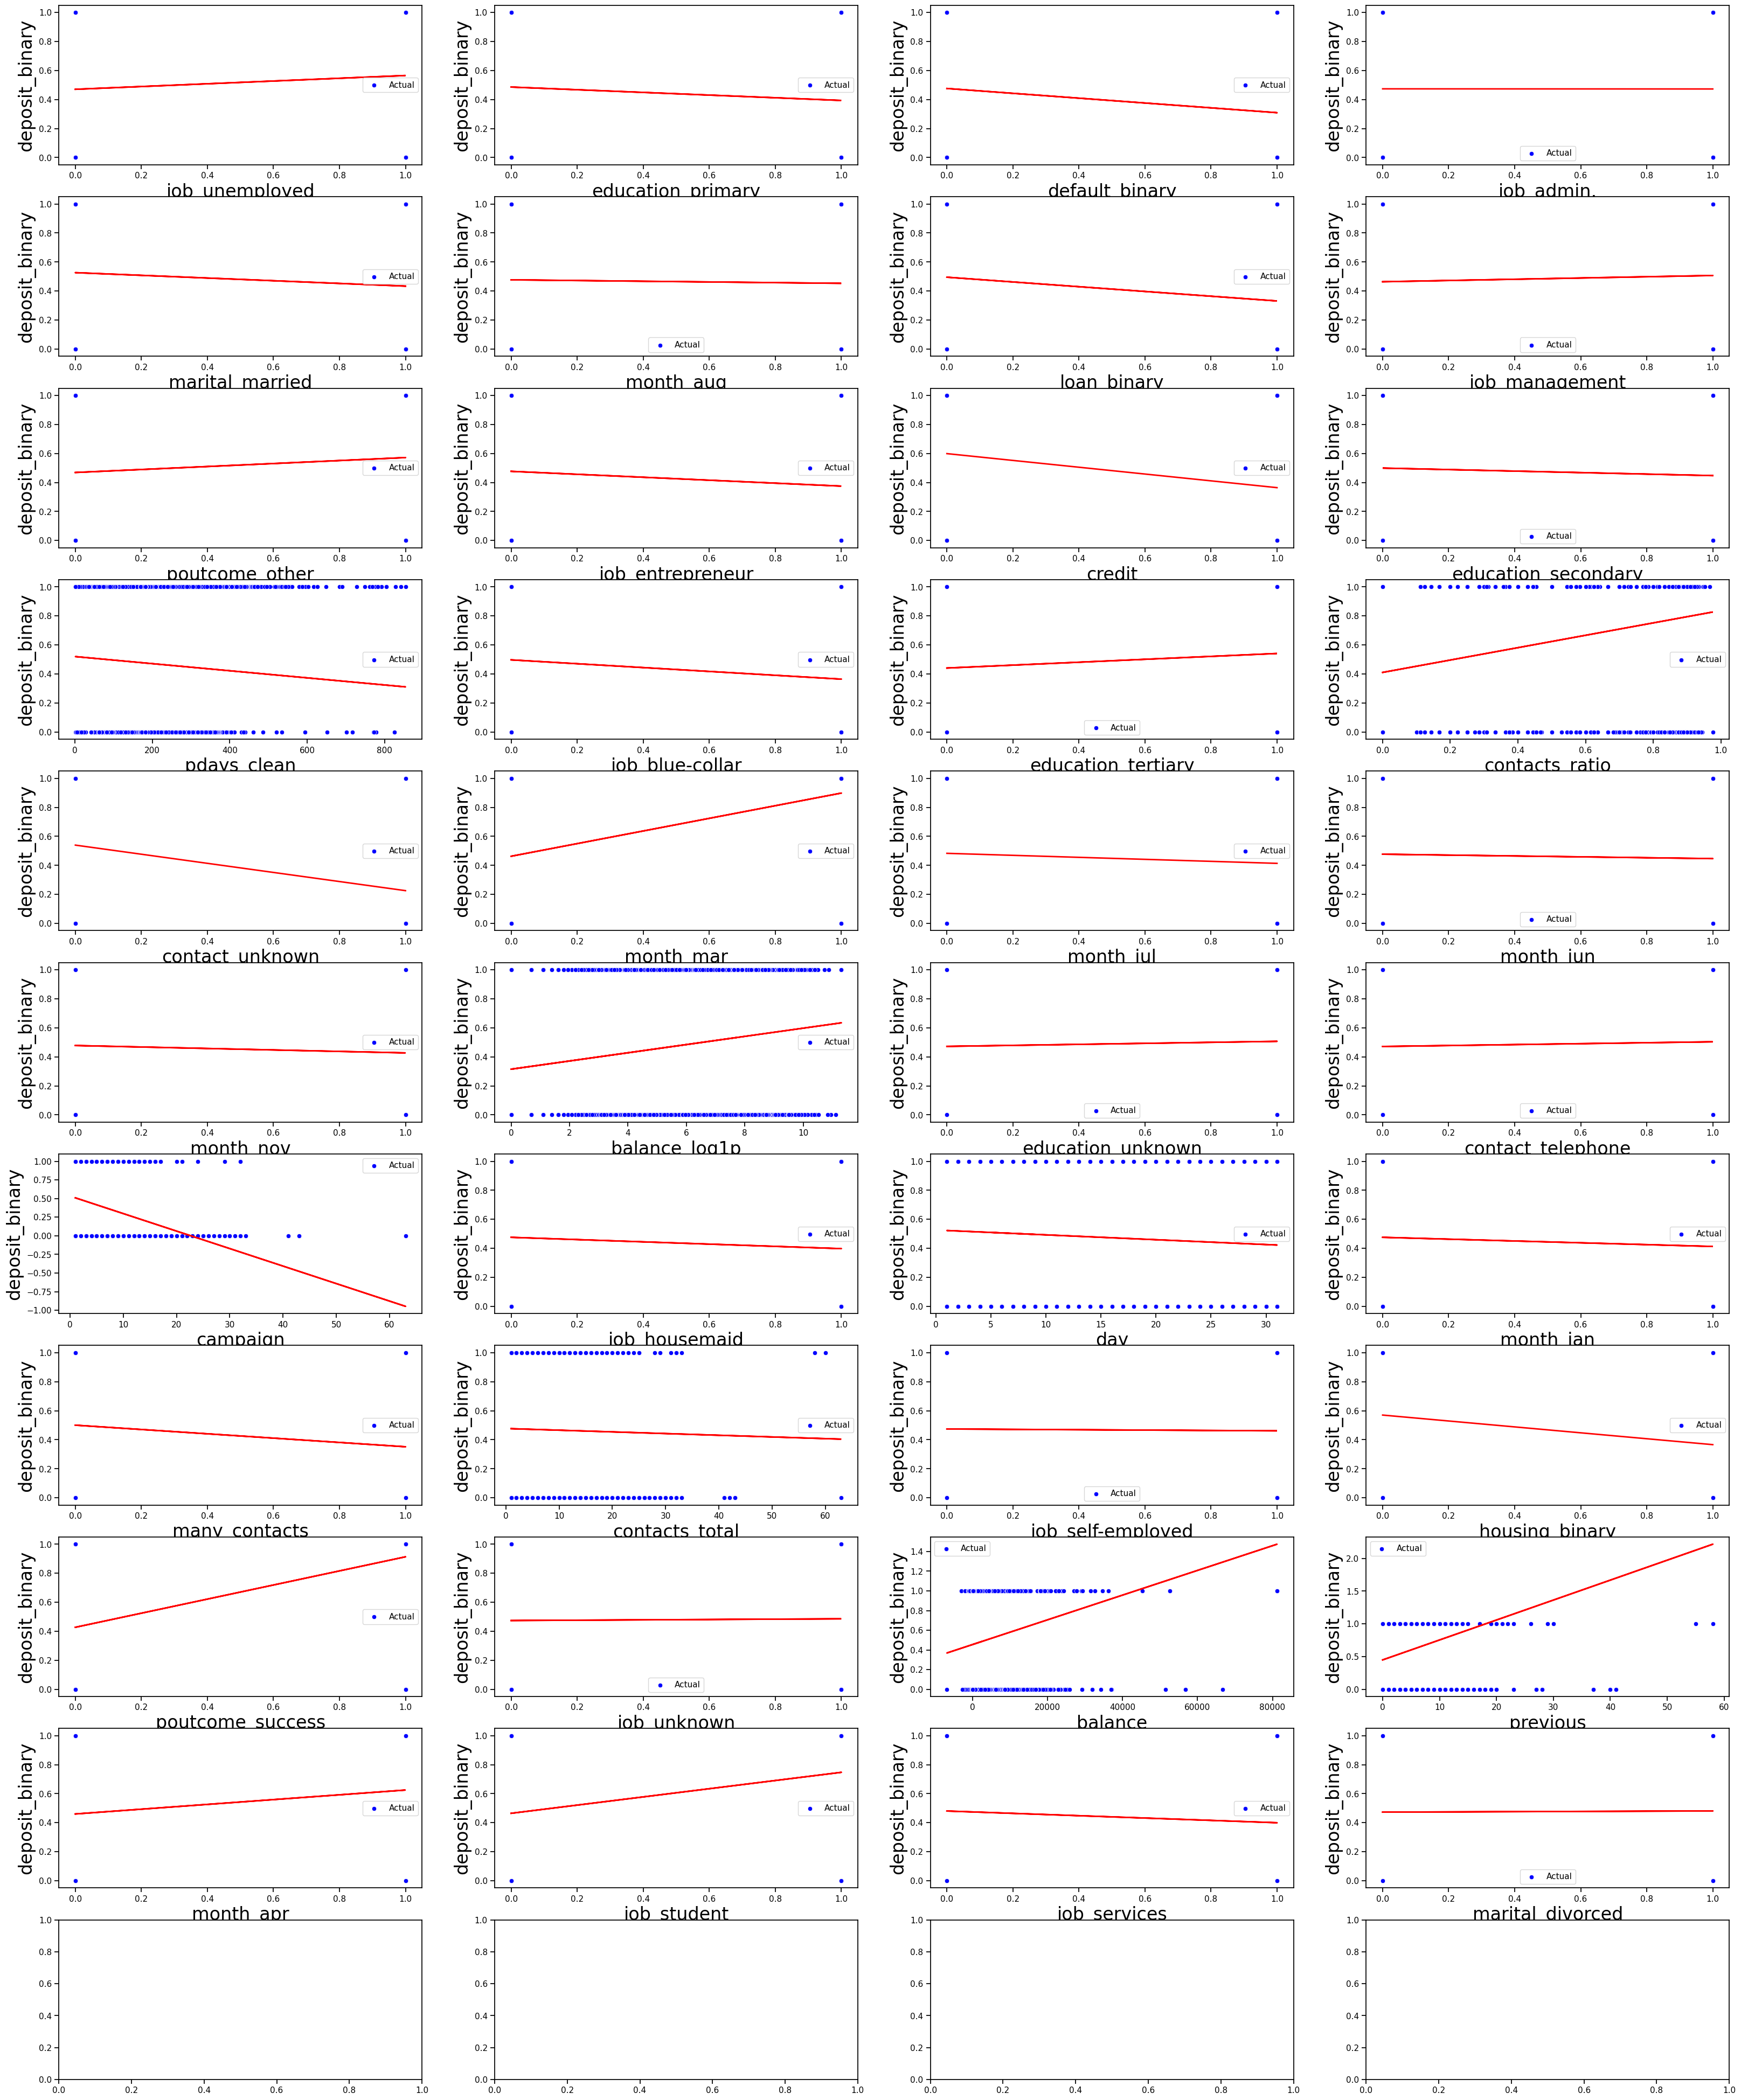

In [363]:
def createLinearRegressionModel (X, y, split = False):
    if split:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = X, X, y, y

    model = LinearRegression()
    model.fit(X_train, y_train) # Erstellen des Regressionsmodells.
    y_pred = model.predict(X_test) # Vorhersage mit Test-Daten

    return (X_test, y_test, y_pred, model)

sns.set_context("notebook", rc={"axes.labelsize": 24})
fig, axes = plt.subplots(11, 4, figsize=(40, 50))  # 2 Reihen, 5 Spalten
for i, f in enumerate (set (df_encoded.columns)-{'deposit_binary'}):
    (x, y_actual, y_predicted, _) = createLinearRegressionModel (df_encoded[numeric_cols_scale][[f]], df_encoded["deposit_binary"]) # model mit _ weil nicht gebraucht
    sns.scatterplot(x=x[f], y=y_actual, color='blue', label='Actual', ax=axes[i//4][i%4])
    axes[i//4][i%4].plot(x, y_predicted, color='red', linewidth=2, label='Predicted')

plt.tight_layout()  # Damit überlappen sich die Plots nicht
plt.show()

In [ ]:
print("Datentypen in X_train:")
print(X_train.dtypes.value_counts())

print("\nNicht-numerische Spalten in X_train:")
non_numeric_train = X_train.select_dtypes(exclude=[np.number]).columns.tolist()
print(non_numeric_train)


Datentypen in X_train:
float64    57
int64       1
Name: count, dtype: int64

Nicht-numerische Spalten in X_train:
[]


In [ ]:
# Nicht-numerische Spalten aus X entfernen
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
X_num = X.drop(columns=non_numeric)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_num_imputed = pd.DataFrame(
    imputer.fit_transform(X_num),
    columns=X_num.columns,
    index=X_num.index
)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_num_imputed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("="*60)
print("3.3 Supervised Learning – Logistische Regression (Baseline)")
print("="*60)

log_reg = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-Score : {f1:.3f}")
print(f"ROC-AUC  : {auc:.3f}")

# Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap='Blues')
plt.title("Konfusionsmatrix – Logistische Regression")
plt.show()

# ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Kurve – Logistische Regression")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("="*60)


3.3 Supervised Learning – Logistische Regression (Baseline)


NameError: name 'LogisticRegression' is not defined

- Die Logistische Regression dient als **Baseline-Klassifikationsmodell** für die Vorhersage von `deposit_bin`.
- Wichtige Kennzahlen:
  - **Accuracy** misst den Gesamtanteil korrekter Vorhersagen.
  - **Precision** gibt an, wie viele der als „Abschluss“ vorhergesagten Fälle tatsächlich Abschlüsse sind.
  - **Recall** misst, wie viele der tatsächlichen Abschlüsse korrekt erkannt werden.
  - **F1-Score** balanciert Precision und Recall.
  - **ROC-AUC** bewertet das Ranking der Wahrscheinlichkeiten unabhängig vom Schwellenwert.
- Die Konfusionsmatrix verdeutlicht das Verhältnis von False Positives und False Negatives.

### Supervised Learning: Entscheidungsbaum (interpretierbares Modell)

3.4 Supervised Learning – Entscheidungsbaum
Accuracy (Tree) : 1.000
Precision (Tree): 1.000
Recall (Tree)   : 1.000
F1-Score (Tree) : 1.000


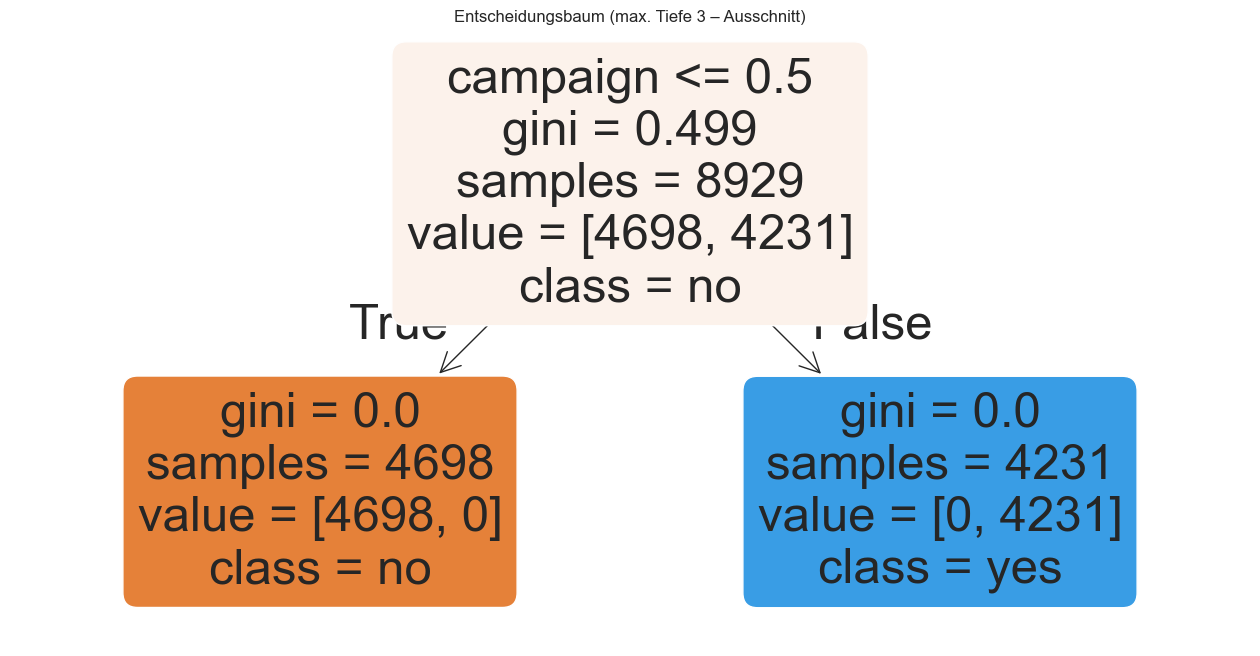

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

print("="*60)
print("3.4 Supervised Learning – Entscheidungsbaum")
print("="*60)

tree_clf = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=100,
    random_state=42
)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

acc_tree  = accuracy_score(y_test, y_pred_tree)
prec_tree = precision_score(y_test, y_pred_tree)
rec_tree  = recall_score(y_test, y_pred_tree)
f1_tree   = f1_score(y_test, y_pred_tree)

print(f"Accuracy (Tree) : {acc_tree:.3f}")
print(f"Precision (Tree): {prec_tree:.3f}")
print(f"Recall (Tree)   : {rec_tree:.3f}")
print(f"F1-Score (Tree) : {f1_tree:.3f}")

plt.figure(figsize=(16, 8))
plot_tree(
    tree_clf,
    feature_names=X.columns,
    class_names=['no', 'yes'],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.title("Entscheidungsbaum (max. Tiefe 3 – Ausschnitt)")
plt.show()

print("="*60)


- Der Entscheidungsbaum liefert ein **gut interpretierbares Modell**:
  - Pfade zeigen, welche Feature-Splits (z.B. `duration_log1p`, `poutcome_*`, `many_contacts`) besonders relevant sind.
  - Die Blätter geben Aufschluss über die geschätzte Abschlusswahrscheinlichkeit je Segment.
- Im Vergleich zur logistischen Regression kann das Modell leichter marketingseitig kommuniziert werden, ist aber ggf. weniger robust und neigt zum Overfitting, wenn es nicht begrenzt wird.

### 3.5 Kurzer Vergleich der Modelle

- **Unsupervised (K-Means)**:
  - Liefert Cluster mit unterschiedlichen Abschlussraten.
  - Kann genutzt werden, um Kundensegmente mit hoher bzw. niedriger Conversion zu identifizieren.
- **Supervised (Logistische Regression vs. Entscheidungsbaum)**:
  - Logistische Regression: Solide Performance, gut geeignet als Baseline und für globale Effekte (Feature-Koeffizienten).
  - Entscheidungsbaum: Besser interpretierbare Segmentregeln, dafür potenziell anfälliger für Overfitting.

Diese Ergebnisse dienen in Schritt 4 als Grundlage, um Performance, Stärken/Schwächen und mögliche Verbesserungen (z.B. Hyperparameter-Tuning, komplexere Modelle, andere k für K-Means) zu diskutieren.
